# <span style='color:purple'>Lab 2</span>

## Group Members
- Helene Barrera
- Feby Thomas
- John Olanipekun
- Justin Ehly

## <span style='color:purple'><u> Lab 2 Executive Summary </u></span>
* This exercise seeks to fit:  
    - **Task 1: Regression**  
    - Estimate Actual Delivery Time Length (using actual delivery time as the test metric)  
        - The actual delivery time duration (days) is taken as the period between order approved and when order was delivered to the customer. It is the timedelta difference between order_approved_at and order_received_customer date attributes.
        - A major practical success factor, with respect to the business, is to use relevant attributes recorded by the order transactions to predict this delivery duration within an error margin (i.e. Root Mean Squared Error) of 3 days.  
        
    - **Task 2: Classification** 
    - Predict review score  
        - To predict review score using relevant attributes that are associated with the review score.
        - A key business purpose of this task is to determine the features that have the most influence on the review score.
            - This will inform improvement to factors that result in negative review score and maintain those that result in positive review score.   
    - **Task 3: Classification**  
    - Predict the payment method of a customer.  


# <span style='color:blue'>Data Preparation Part 1</span>
* [10 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.

## <span style='color:blue'><u> Data Preparation and pre-processing: Approach </u></span>
* This exercise seeks to fit:
    - **Data Preparation** 'Olist_lab1_data.csv' (114067 instances and 47 attributes) will be prepared for the model.  
        - This dataset is the resulted from robust data preparation steps applied to the original raw dataset.
        - This was submitted at the deliverable for Lab 1.
        - As reminder, the original raw dataset was received in multiple files (10 files).
        - This files were merged using the attribute's unique key contraints as the case may be.  
        - In the current version of the dataset we will take care of the following:
            - re-label categorical levels with less than 500 observations as 'others'.
            - Beneficially, this will imply that the new columns generated by one hot encoding are actual contributing useful variance to the dataset.
            - It will all improve class imbalance with respect to the affected attributes.
            - Suspect categorical attributes are Product categories and Customer city;
            - The resulting one-to-many effect of the join operation used to merge the dataset may have caused some instances to be duplicated when certain unique id attributes are dropped from the eventual dataset.
            - The duplicates in the final version of the dataset will be removed, chiefly because:
                - According to Schafer (2013, pp. 91), independence of observations is a key assumption that should be met before applying linear models to a dataset. Occurence of duplicates in our dataset can cause cluster effect which directly implies a lack of independence (e.g. Schafer 2013, pp. 91). 
               **Reference**: Ramsey Schafer, 2013: The Statistical Sleuth. 3rd Edition.       
    

## <span style='color:red'>Lab 1 Data Summary</span>

* 'Olist_lab1_data.csv' (114067 instances and 47 attributes) will be prepared for this model.  
     - This dataset is the result of robust data preparation steps applied to the original raw dataset that was submitted in the deliverable for Lab 1.
        - As reminder, the original raw dataset was received in multiple files (10 files).
        - The files were merged using the attribute's unique key contraints as the case may be.  

### Data loading

**Dataset import from Github**  
Given the multi user input into the dataset, we created a technique that will access the dataset from its location on the github page. This is much better than each user having to change directory (os.chdir()) each time we want to work on the project.  

This code used to import the data was found in a Medium journal post written by Thomas Le Menestrel (*'Loading a csv file from GitHub in Python'*) :  
https://medium.com/towards-entrepreneurship/importing-a-csv-file-from-github-in-a-jupyter-notebook-e2c28e7e74a5  

In [1]:
import requests
import io
import copy
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Make sure the url is the raw version of the file on GitHub
url = "https://raw.githubusercontent.com/justinehly/olist/main/data/olist_lab1_data.csv" 
github_file = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

olist_download = pd.read_csv(io.StringIO(github_file.decode('utf-8')))
olist_download.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,seller_state,tot_order_amt,purchase_wk_day,purchase_month,review_score_class,order_delivery_actual_duration,order_delivery_estimated_duration,delivery_estimate_discrepancy,product_dimensions,delivery_est_discrepancy_range
0,b81ef226f3fe1789b1e8b2acac839d17,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,...,SP,99.33,Wednesday,April,bad,13,26,13,7803.0,too early
1,a9810da82917af2d9aefd1278f1dcfa0,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,...,SP,24.39,Tuesday,June,good,3,19,16,1056.0,too early
2,25e8ea4e93396b6fa0d3dd708e76c1bd,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,...,SP,65.71,Tuesday,December,good,4,20,16,3360.0,too early
3,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early
4,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early


In [2]:
olist_download.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           114067 non-null  object 
 1   customer_id                        114067 non-null  object 
 2   order_purchase_timestamp           114067 non-null  object 
 3   order_approved_at                  114067 non-null  object 
 4   order_delivered_carrier_date       114067 non-null  object 
 5   order_delivered_customer_date      114067 non-null  object 
 6   order_estimated_delivery_date      114067 non-null  object 
 7   customer_unique_id                 114067 non-null  object 
 8   customer_zip_code_prefix           114067 non-null  int64  
 9   customer_city                      114067 non-null  object 
 10  customer_state                     114067 non-null  object 
 11  review_id                          1140

In [3]:
#Checkpoint: 
olist = copy.deepcopy(olist_download)

In [4]:
olist.info() # initial data read

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           114067 non-null  object 
 1   customer_id                        114067 non-null  object 
 2   order_purchase_timestamp           114067 non-null  object 
 3   order_approved_at                  114067 non-null  object 
 4   order_delivered_carrier_date       114067 non-null  object 
 5   order_delivered_customer_date      114067 non-null  object 
 6   order_estimated_delivery_date      114067 non-null  object 
 7   customer_unique_id                 114067 non-null  object 
 8   customer_zip_code_prefix           114067 non-null  int64  
 9   customer_city                      114067 non-null  object 
 10  customer_state                     114067 non-null  object 
 11  review_id                          1140

## <span style='color:red'>Modify class variable representations </span>
 - i.e. ensure they represented as one of: category, int, float, datetime.  

In [5]:
# clean up attributes in the relaoded dataset from lab 1

#changing attributes data types
continuous_features = ['price','freight_value', 'payment_sequential','payment_installments','payment_value',
                      'product_name_length','product_description_length', 'product_photos_qty','product_weight_g',
                      'product_length_cm','product_height_cm','product_width_cm', 'review_score'] 

cat_features = ['customer_city','customer_state','customer_zip_code_prefix','seller_zip_code_prefix',
                'seller_city','seller_state','product_category_english','review_id','review_comment_title',
                'review_comment_message','payment_type','order_item_id', 'product_id','seller_id','order_id', 
                'customer_id','customer_unique_id','delivery_est_discrepancy_range','purchase_month','purchase_wk_day',
                'review_score_class'] 

date_features = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                 'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp'] 

# use the "astype" function to change the variable type

olist[cat_features] = olist.copy()[cat_features].astype('category')

olist[continuous_features] = olist.copy()[continuous_features].astype(np.float64)

# fix dates

for i in date_features:
    olist.loc[:,i] = pd.to_datetime(olist.copy().loc[:,i], errors="coerce")

print('Duplicates: %d' %(olist.duplicated().sum()))

# let's remove nominal values (anything with the label x_id) and anything with possible NaNs such as the comments
olist = olist.drop(columns = ['review_comment_title','review_comment_message','review_id','order_id','customer_id',
                              'order_item_id','product_id','seller_id','customer_unique_id','product_length_cm',
                              'product_width_cm','product_height_cm','payment_value','delivery_estimate_discrepancy',
                              'delivery_est_discrepancy_range','order_delivery_estimated_duration', 
                              'order_delivered_carrier_date', 'order_delivered_customer_date','order_estimated_delivery_date',
                              'review_creation_date','review_answer_timestamp','shipping_limit_date'],
                   axis=1) 

print('Duplicates after dropping unneeded columns: %d,' %(olist.duplicated().sum()))
# looks like removing those columns made it look like we have duplicates, to keep from overfitting the model
# we  will go ahead and remove those
print('Dropping Duplicates\n')
olist.drop_duplicates(inplace=True)
print('Duplicates after drop: %d' %(olist.duplicated().sum()))

missing = olist[olist.product_weight_g.isna()].index.values.tolist()[0]
print('Index %d is missing values in product_weight and product_dimensions' % (missing))
olist = olist.drop(index = missing, axis=0)

print('We now have %d records missing values\n' % (olist.isna().any().sum()))

print('====== olist.info() =======\n')
olist.info()

Duplicates: 0
Duplicates after dropping unneeded columns: 10706,
Dropping Duplicates

Duplicates after drop: 0
Index 40711 is missing values in product_weight and product_dimensions
We now have 0 records missing values

====== olist.info() =======

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103360 entries, 0 to 114066
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   order_purchase_timestamp        103360 non-null  datetime64[ns]
 1   order_approved_at               103360 non-null  datetime64[ns]
 2   customer_zip_code_prefix        103360 non-null  category      
 3   customer_city                   103360 non-null  category      
 4   customer_state                  103360 non-null  category      
 5   review_score                    103360 non-null  float64       
 6   payment_sequential              103360 non-null  float64       
 7   payment_type  

**Correlation matrix**  
- As a reminder the linear correlation matrix is shown below.
- It reveals the extent of pairwise association (i.e. Pearson correlation coeficient) between the plotted attributes.  
- The raw linear correlation coefficient is generally weak: < 0.3 
    - For Task 1: Predicting order_delivery_actual_duration:
        - review score and freight value attributes have the strongest association with the response variable (order_delivery_actual_duration).  
     - For Task 2: Predicting review score:
         - order_delivery_actual_duration attribute has the strongest association with the response variable (review score).  

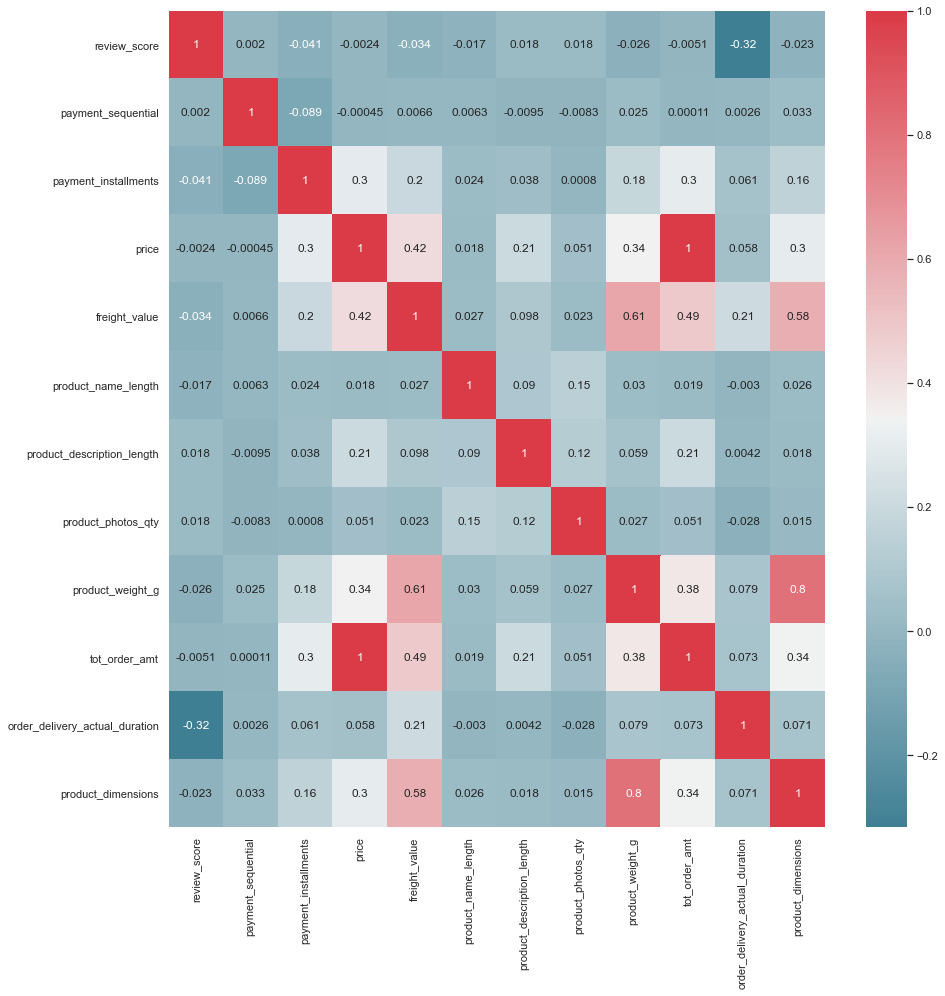

In [6]:
# plot the correlation matrix using seaborn 
# sns.corrplot() was depricated with v0.6!!!

sns.set(style="darkgrid") # one of the many styles to plot using

cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

f, ax = plt.subplots(figsize=(14,14))

sns.heatmap(olist.corr(), cmap=cmap, annot=True)

f.tight_layout()

In [7]:
#check point
olist_model = copy.deepcopy(olist)
#olist_model.head()

In [8]:
olist_model.head()

,order_purchase_timestamp,order_approved_at,customer_zip_code_prefix,customer_city,customer_state,review_score,payment_sequential,payment_type,payment_installments,price,...,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt,purchase_wk_day,purchase_month,review_score_class,order_delivery_actual_duration,product_dimensions
0,2018-04-25 22:01:49,2018-04-25 22:15:09,39801,teofilo otoni,MG,1.0,1.0,credit_card,8.0,79.80,...,home_construction,13321.0,salto,SP,99.33,Wednesday,April,bad,13,7803.0
1,2018-06-26 11:01:38,2018-06-26 11:18:58,2422,sao paulo,SP,5.0,1.0,credit_card,1.0,17.00,...,auto,4660.0,sao paulo,SP,24.39,Tuesday,June,good,3,1056.0
2,2017-12-12 11:19:55,2017-12-14 09:52:34,2652,sao paulo,SP,5.0,1.0,credit_card,1.0,56.99,...,perfumery,9015.0,santo andre,SP,65.71,Tuesday,December,good,4,3360.0
3,2017-12-06 12:04:06,2017-12-06 12:13:20,36060,juiz de fora,MG,5.0,1.0,credit_card,8.0,89.90,...,bed_bath_table,13405.0,piracicaba,SP,107.78,Wednesday,December,good,14,3080.0
5,2018-05-21 13:59:17,2018-05-21 16:14:41,18570,conchas,SP,5.0,1.0,credit_card,2.0,113.57,...,bed_bath_table,14940.0,ibitinga,SP,128.45,Monday,May,good,11,11880.0


### Product_Category Levels <br>

- Some categories have levels with much 'rare' instances.
- Most importantly, the 'product_category attribute.  
- The charts show that many of the product categories have relatively few observations. Categories with less than 500 observations were converted into an 'other_category' level. 

{'bodies': [<matplotlib.collections.PolyCollection at 0x18dc0fea8b0>],
 'cmeans': <matplotlib.collections.LineCollection at 0x18dc0fea6d0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x18dc0fea730>,
 'cmins': <matplotlib.collections.LineCollection at 0x18dc10000a0>,
 'cbars': <matplotlib.collections.LineCollection at 0x18dc10003a0>}

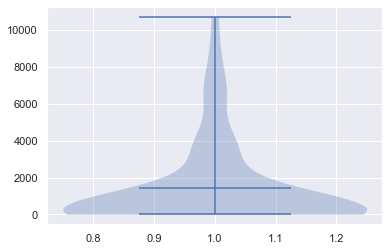

In [9]:
#violin plot of customer cities
#Creatng a dataframe from the .value_counts attribute enabled us to access the product categories as levels.
prod_cat = olist_model.product_category_english.value_counts().to_frame()
prod_cat=prod_cat.reset_index()
plt.violinplot(prod_cat.product_category_english, showmeans=True)

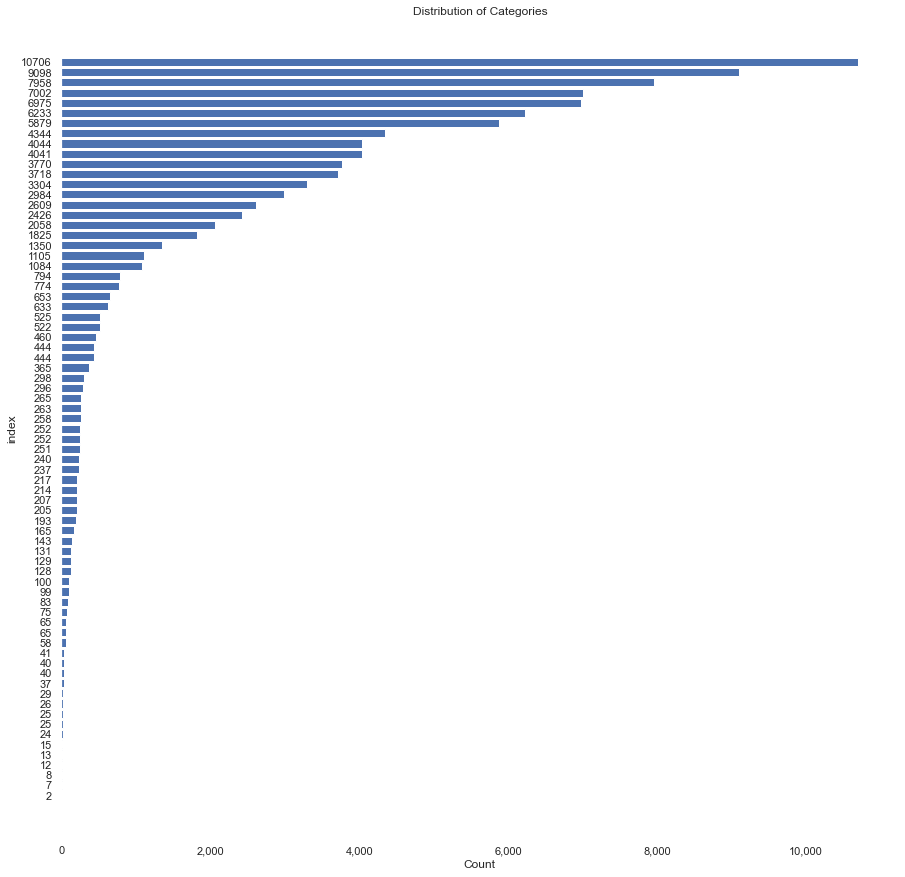

In [10]:
# Chart distribution of categories
fig, ax = plt.subplots(figsize=(15,15))
y = prod_cat.product_category_english
y_pos = np.flip(np.arange(len(y)))
width = prod_cat.product_category_english
ax.barh(y_pos, width=width, align='center')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_facecolor('white')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
plt.title('Distribution of Categories')
plt.ylabel('index')
plt.xlabel('Count')
plt.show()

From the violin and horizontal bar plots, we can see a very very heavily skewed distribution of observation counts among the levels of the 'product_category_english' column. Many of the levels have fewer than 100 observations. These 'rare' levels will be re-labeled as 'others'. 

In [11]:
#Check point
olist_model2 = copy.deepcopy(olist_model)

In [12]:
#replace instances that are less than 500 with 'other_product_category'

inst = olist_model2.product_category_english.value_counts() # get value counts
under500 = inst < 500 # boolean list
other = inst[under500] # index will provide list of categories to replace

olist_model2.product_category_english =  olist_model2.product_category_english.replace(other.index, 'other_product_category')
olist_model2.product_category_english.value_counts()

bed_bath_table                     10706
health_beauty                       9098
sports_leisure                      7958
furniture_decor                     7002
computers_accessories               6975
other_product_category              6946
housewares                          6233
watches_gifts                       5879
telephony                           4344
toys                                4044
auto                                4041
cool_stuff                          3770
garden_tools                        3718
perfumery                           3304
baby                                2984
electronics                         2609
stationery                          2426
fashion_bags_accessories            2058
pet_shop                            1825
office_furniture                    1350
luggage_accessories                 1105
consoles_games                      1084
construction_tools_construction      794
home_appliances                      774
musical_instrume

In [13]:
#Create value counts as a dataframe to index/access attributes for plots
prod_cat = olist_model2.product_category_english.value_counts().to_frame()
#prod_cat=prod_cat.reset_index()

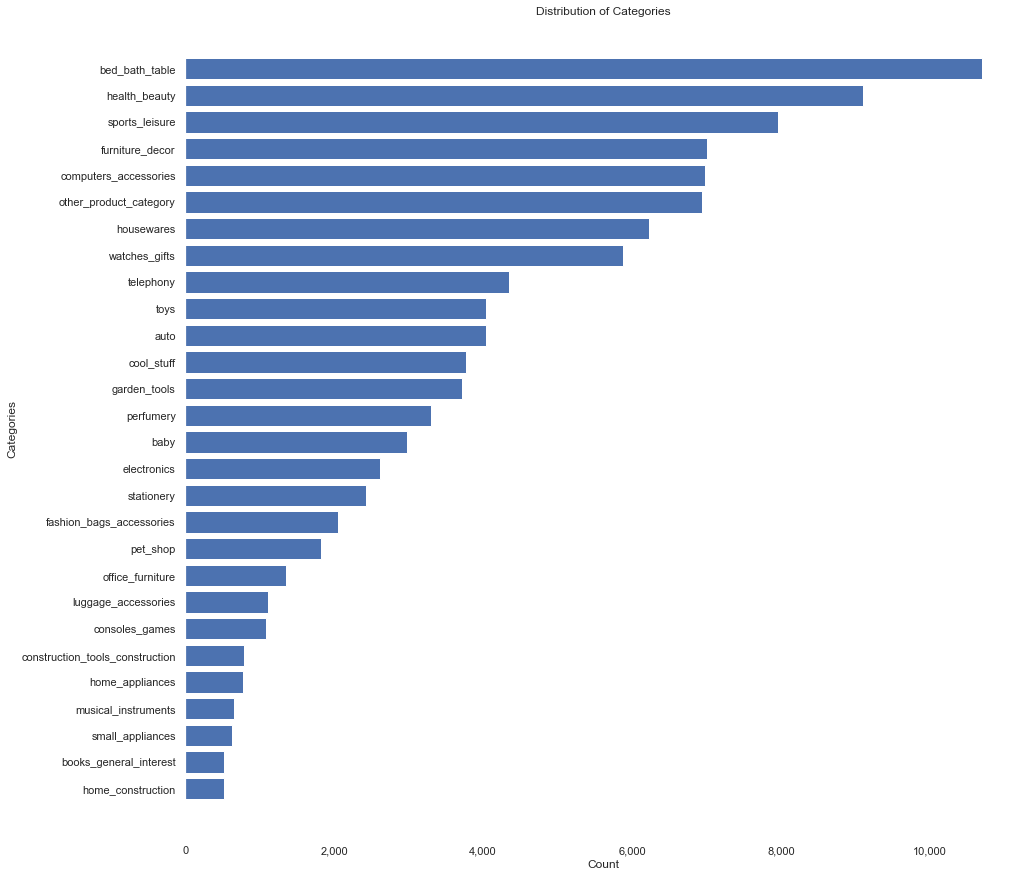

In [14]:
# Chart distribution of categories following the change
fig, ax = plt.subplots(figsize=(15,15))
cats = prod_cat.index
y_pos = np.flip(np.arange(len(cats)))
width = prod_cat.product_category_english
ax.barh(y_pos, width=width, align='center')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_facecolor('white')
ax.set_yticks(y_pos)
ax.set_yticklabels(cats)
plt.title('Distribution of Categories')
plt.ylabel('Categories')
plt.xlabel('Count')
plt.show()

In [15]:
#How many levels do we now have in comparison with the previous version?
olist_model.product_category_english.nunique(), olist_model2.product_category_english.nunique()

(73, 28)

- Now we see that 'rarely' occurring levels have been re-coded.
- bed_bath_table and health_beauty have the most number of observations.
- This reduces our number of levels by more than 50% in product category attribute.

## <span style='color:red'>Intuitive Feature Selection</span>
- For initial dimensionality reduction we removed nominal values (anything with the label x_id) and anything with possible NaNs such as the comments. 
- We also removed highly correlated values including:
    - weight, length and height that were all use to form the product_dimensions feature in Lab 1.
    - payment_value that is highly correlated with tot_order_amt and price.
    - delivery_estimate_discrepency since that was a variable created in Lab 1 for data analysis.
    - seller_city, seller_state, customer_city, and customer_state, since those are represented more specifically by respective zip code prefix variables. 
- Most timestamp columns were removed as well, with the exception of order_approved_at because we think we might need that value in our modeling phase

**Feature selection** 
    - Based on business understanding, the features that are relevant for predicting actual_delivery_duration (days) will be manually selected, especially given that the number of columns are not too many to assess.
    - it is believed that manual selection is more effective than using an algorithm for the selection since irrelevant attributes sometimes end up in such outputs, at times.

### Relevance of order hour of day   
**Create hour of day attribute**  
- Perceived logistical reasons suggests that a possible association may exist between the hour of day that the order was approved and the how long it takes for the customer to receive the order.  
- similarly their could be association between the hour of day that the order was purchased and the payment method used. 
- two new attributes will be created for the hour of day that the order was approved. 
- The hour of day will be extracted from the order_approved_at timestamp and 'order_purchase_timestamp'

#### Working with the date.

**Hour Extraction**
- Round off the approved_at time datatype to nearest hour. 
    - e.g.: 9.52 = 10.00, 11:18 = 11:00
- Then extract the rounded off hour from the full timestamp
- Following successful extraction, we change the resulting object datatype to integar datatype
- Unused columns will be dropped afterwards

In [16]:
# these will be derived from order_purchase_timestamp into numerical values

olist_model2['purchase_year'] = olist_model2.order_purchase_timestamp.dt.year
olist_model2['purchase_month_num'] = olist_model2.order_purchase_timestamp.dt.month
olist_model2['purchase_day_num'] = olist_model2.order_purchase_timestamp.dt.dayofweek
olist_model2['purchase_hour'] = olist_model2.order_purchase_timestamp.dt.hour
olist_model2.drop(columns = ['order_purchase_timestamp'], inplace=True)

In [17]:
olist_model2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103360 entries, 0 to 114066
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   order_approved_at               103360 non-null  datetime64[ns]
 1   customer_zip_code_prefix        103360 non-null  category      
 2   customer_city                   103360 non-null  category      
 3   customer_state                  103360 non-null  category      
 4   review_score                    103360 non-null  float64       
 5   payment_sequential              103360 non-null  float64       
 6   payment_type                    103360 non-null  category      
 7   payment_installments            103360 non-null  float64       
 8   price                           103360 non-null  float64       
 9   freight_value                   103360 non-null  float64       
 10  product_name_length             103360 non-null  float64

In [18]:
#Subset for the modeling dataset
olist_model3 = olist_model2[['customer_zip_code_prefix', 'payment_sequential', 
                             'payment_type', 'payment_installments', 'freight_value',
                             'product_weight_g','product_category_english', 
                             'seller_zip_code_prefix', 'tot_order_amt', 
                             'purchase_wk_day', 'purchase_month', 'review_score_class',   
                             'order_delivery_actual_duration', 'product_dimensions',
                             'order_approved_at','purchase_year','purchase_hour','purchase_month_num',
                             'purchase_day_num']]

In [19]:
olist_model3.head(n=15)

,customer_zip_code_prefix,payment_sequential,payment_type,payment_installments,freight_value,product_weight_g,product_category_english,seller_zip_code_prefix,tot_order_amt,purchase_wk_day,purchase_month,review_score_class,order_delivery_actual_duration,product_dimensions,order_approved_at,purchase_year,purchase_hour,purchase_month_num,purchase_day_num
0,39801,1.0,credit_card,8.0,19.53,800.0,home_construction,13321.0,99.33,Wednesday,April,bad,13,7803.0,2018-04-25 22:15:09,2018,22,4,2
1,2422,1.0,credit_card,1.0,7.39,150.0,auto,4660.0,24.39,Tuesday,June,good,3,1056.0,2018-06-26 11:18:58,2018,11,6,1
2,2652,1.0,credit_card,1.0,8.72,250.0,perfumery,9015.0,65.71,Tuesday,December,good,4,3360.0,2017-12-14 09:52:34,2017,11,12,1
3,36060,1.0,credit_card,8.0,17.88,1200.0,bed_bath_table,13405.0,107.78,Wednesday,December,good,14,3080.0,2017-12-06 12:13:20,2017,12,12,2
5,18570,1.0,credit_card,2.0,14.88,835.0,bed_bath_table,14940.0,128.45,Monday,May,good,11,11880.0,2018-05-21 16:14:41,2018,13,5,0
6,13614,1.0,credit_card,2.0,13.71,623.0,bed_bath_table,14940.0,48.06,Monday,May,good,7,6510.0,2018-05-07 15:31:14,2018,13,5,0
8,31230,1.0,credit_card,1.0,21.26,7000.0,housewares,13206.0,81.16,Friday,June,good,10,32994.0,2017-06-23 13:25:19,2017,13,6,4
9,15200,1.0,credit_card,3.0,11.85,425.0,perfumery,17350.0,51.84,Monday,June,good,18,2376.0,2017-06-05 10:55:16,2017,10,6,0
10,58410,1.0,credit_card,6.0,72.09,3250.0,auto,30120.0,341.09,Sunday,July,good,5,11440.0,2018-07-23 11:32:08,2018,14,7,6
11,17780,1.0,boleto,1.0,15.10,650.0,other_product_category,26020.0,51.95,Tuesday,July,good,7,10500.0,2017-07-06 03:15:36,2017,20,7,1


In [20]:
olist_model3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103360 entries, 0 to 114066
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   customer_zip_code_prefix        103360 non-null  category      
 1   payment_sequential              103360 non-null  float64       
 2   payment_type                    103360 non-null  category      
 3   payment_installments            103360 non-null  float64       
 4   freight_value                   103360 non-null  float64       
 5   product_weight_g                103360 non-null  float64       
 6   product_category_english        103360 non-null  category      
 7   seller_zip_code_prefix          103360 non-null  category      
 8   tot_order_amt                   103360 non-null  float64       
 9   purchase_wk_day                 103360 non-null  category      
 10  purchase_month                  103360 non-null  categor

### Review Scores as a Category <br>
In Lab 1, we took the review scores that had a range of 1-5 and converted them into 3 categories called Bad (1-2), Fair (3-4), and Good (5). For this lab, we will convert them to numerical categories(0 = Bad, 1 = fair, 2 = Good) to make it more compatible for the machine learning models to work with. 

In [21]:
#Convert review score levels into numerical variables using the order of appearance of their categorical level in the dataset
olist_model3.review_score_class.unique()
olist_model3['review_score_class_num'] = olist_model3.review_score_class.astype("category").cat.codes.copy()

#so: 0 = Bad, 1 = fair, 2 = Good
olist_model3.review_score_class_num.value_counts()

<ipython-input-21-830d42fcf825>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olist_model3['review_score_class_num'] = olist_model3.review_score_class.astype("category").cat.codes.copy()


2    80189
0    14479
1     8692
Name: review_score_class_num, dtype: int64

It can be seen from the above output that review score class is highly disproportional. Most review scores are Good.

**Hour Extraction**
- Round off the approved_at time datatype to nearest hour. 
    - e.g.: 9.52 = 10.00, 11:18 = 11:00
- Then extract the rounded off hour from the full timestamp
- Following successful extraction, we change the resulting object datatype to integar datatype
- Unused columns will be dropped afterwards

In [22]:
#create a new column for the hour of day of the order
olist_model3['order_approved_time2'] = olist_model3['order_approved_at'].round('H')

<ipython-input-22-c566d91969ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olist_model3['order_approved_time2'] = olist_model3['order_approved_at'].round('H')


In [23]:
olist_model3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103360 entries, 0 to 114066
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   customer_zip_code_prefix        103360 non-null  category      
 1   payment_sequential              103360 non-null  float64       
 2   payment_type                    103360 non-null  category      
 3   payment_installments            103360 non-null  float64       
 4   freight_value                   103360 non-null  float64       
 5   product_weight_g                103360 non-null  float64       
 6   product_category_english        103360 non-null  category      
 7   seller_zip_code_prefix          103360 non-null  category      
 8   tot_order_amt                   103360 non-null  float64       
 9   purchase_wk_day                 103360 non-null  category      
 10  purchase_month                  103360 non-null  categor

In [24]:
#Extract the hour from from the newly created time
olist_model3['order_approved_hour'] = olist_model3['order_approved_time2'].dt.strftime('%H')

<ipython-input-24-3dac179a0305>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olist_model3['order_approved_hour'] = olist_model3['order_approved_time2'].dt.strftime('%H')


In [25]:
olist_model3['order_approved_hour'] = olist_model3['order_approved_hour'].astype("int32")

<ipython-input-25-a30bc0b73e5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olist_model3['order_approved_hour'] = olist_model3['order_approved_hour'].astype("int32")


**Extraction**
- order_approved_time2 shows the timestamp with hour segment rounded off
- order_approved_hour shows the final result of the extraction.
- order_approved_hour now renders some columns irrelevant
    - these irrrelevant columns will be removed BUT we use a deep copy() of the dataset from here on.

In [26]:
#Checkpoint: 
olist_model4 = copy.deepcopy(olist_model3)

In [27]:

#It is preferable for the attribute to be in float so show the model that it is continuous
olist_model4['order_deliver_actual_duration'] = olist_model4['order_delivery_actual_duration'].astype("float64")

In [28]:
#Remove columns that are re-coded.
olist_model4.drop(columns=['order_delivery_actual_duration', 
                           'review_score_class', 
                           'order_approved_time2',
                           'order_approved_at',
                           'order_approved_hour'
                          ], inplace =True) #it is safe to use inplace=True since this is a copy of the dataset.

In [29]:
olist_model4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103360 entries, 0 to 114066
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   customer_zip_code_prefix       103360 non-null  category
 1   payment_sequential             103360 non-null  float64 
 2   payment_type                   103360 non-null  category
 3   payment_installments           103360 non-null  float64 
 4   freight_value                  103360 non-null  float64 
 5   product_weight_g               103360 non-null  float64 
 6   product_category_english       103360 non-null  category
 7   seller_zip_code_prefix         103360 non-null  category
 8   tot_order_amt                  103360 non-null  float64 
 9   purchase_wk_day                103360 non-null  category
 10  purchase_month                 103360 non-null  category
 11  product_dimensions             103360 non-null  float64 
 12  purchase_year   

## <span style='color:red'>Duplicates</span>
- Removing a lot of variables caused some duplication among the records so we will go ahead and remove those to maintain independence in the observations.

- See earlier section for explanation    

In [30]:
print('Duplicates before drop: %d' % (olist_model4.duplicated().sum()))
olist_model4.drop_duplicates(inplace=True)
print('Duplicates after drop: %d' % (olist_model4.duplicated().sum()))

Duplicates before drop: 302
Duplicates after drop: 0


In [31]:
olist_model4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103058 entries, 0 to 114066
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   customer_zip_code_prefix       103058 non-null  category
 1   payment_sequential             103058 non-null  float64 
 2   payment_type                   103058 non-null  category
 3   payment_installments           103058 non-null  float64 
 4   freight_value                  103058 non-null  float64 
 5   product_weight_g               103058 non-null  float64 
 6   product_category_english       103058 non-null  category
 7   seller_zip_code_prefix         103058 non-null  category
 8   tot_order_amt                  103058 non-null  float64 
 9   purchase_wk_day                103058 non-null  category
 10  purchase_month                 103058 non-null  category
 11  product_dimensions             103058 non-null  float64 
 12  purchase_year   

In [32]:
# creating stopping point copy and distribute model dataframes
grids = copy.deepcopy(olist_model4)  # for conducting a gridsearchcv on a reduced version of the dataset
delivery_model = copy.deepcopy(olist_model4)
review_model = copy.deepcopy(olist_model4)
payment_model = copy.deepcopy(olist_model4)


# <span style='color:blue'>Data Preparation Part 2</span>
* [5 points] Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

In [33]:
olist_model4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103058 entries, 0 to 114066
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   customer_zip_code_prefix       103058 non-null  category
 1   payment_sequential             103058 non-null  float64 
 2   payment_type                   103058 non-null  category
 3   payment_installments           103058 non-null  float64 
 4   freight_value                  103058 non-null  float64 
 5   product_weight_g               103058 non-null  float64 
 6   product_category_english       103058 non-null  category
 7   seller_zip_code_prefix         103058 non-null  category
 8   tot_order_amt                  103058 non-null  float64 
 9   purchase_wk_day                103058 non-null  category
 10  purchase_month                 103058 non-null  category
 11  product_dimensions             103058 non-null  float64 
 12  purchase_year   

**Final Feature list table**  
- Describes the final repository dataset that will be used for the modeling.
    - The tasks will use most of the dataset but a few irrelevant attributes will be excluded in Task 3.

- FINAL FEATURE LIST
| No | Feature Name | Feature Description |
| -:- |:------------ | :------------------- |
| 1 | customer_zip_code_prefix | first five digits of customer zip code |
| 2 | payment_installments | number of payment installments by customer |
| 3 | payment_sequential | number of payment methods used by the customer |
| 4 | payment_type | Payment method used by the customer [Credit card, Debit card, Boleto, Voucher] |
| 5 | product_category_english | product category name in English |
| 6 | product_dimensions | product length x width x height |
| 7 | product_weight_g | product weight measured in grams |
| 8 | purchase_hour | numerical representation of the purchase hour 0-23 |
| 9 | purchase_month | name of month |
| 10 | purchase_year | numerical representation of the purchase year 2016-2018 |
| 11 | purchase_day_num | numerical representation of the purchase day 0-6 |
| 12 | purchase_month_num | numerical representation of the purchase month 1-12 |
| 13 | purchase_wk_day | name of day |
| 14 | review_score_class | classes = [bad (1-2), fair (3-4), good (5)] |
| 15 | seller_zip_code_prefix | first five digits of seller zip code |
| 16 | tot_order_amt | price + freight_value |
| 17 | order_deriver_actual_duration | time in days from when the order was approved to when it was delivered to customer |


---
# <span style='color:blue'>Modeling and Evaluation 1 [10 points]</span>
<br>

- Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.
---

##### <span style='color:red'> Task 1: Predict Delivery Days  </span>

**Explanation**  
- For the regression task we will use Root Mean Squared Error (RMSE).   
    - Not only because it is the most popular but chiefly because it is computed on the same scale as the target response.  

- The metrics will be compared among the models to see which one is the best.

##### <span style='color:red'>Task 2: Predict Review Score   </span>

- The next section is a multi-class classification task. For that we will present the classification report but will higher importance on the F1-score, recall and precision.   
- Primarily, this data set is heavily imbalanced and we have strong interest in one of the minority classes. 
    - Therefore, we will like to know the performance of the model in correctly classifying the minority classes both as a proportion of the class in the dataset (recall) as well as in its predicted labels (precision). The F1 score is a derivative of both precision and recall so it can also be be useful as a metric that summarizes sensitivity to each minority class.  

##### <span style='color:red'>Task 3: Classification of payment_type</span>
- Unlike binary classification where we have true positives, true negatives, false positives and false negatives, with multinomial classification it gets more complicated because a false positive can simulanesouly be a false negtive, a true negative is a true positive for another class...to keep this simple we can focus on precision that is TP/TP+FP and recall or sensitivity that is TP/TP+FN. To True Positive for our classifier is when a payment method is correctly predicted. False Positive is looking down a column where a predicted value is incorrect and False Negative is lookig across a row where predicted values are incorrect. To get the best mix of these predictions we utilize the f-measure that is (precision * recall)/ (precision + recall).<br><br>

- Since we have an unbalanced class distribution for payment method with a strong preference for credit cards and very low preference for customers to use debit cards, we should use the F-measure to find the best balance between precision and recall to train our model vs accuracy that puts more importance on true positives and true negatives. Accuracy = (TP+TN)/(P+N), but in multilnomial classification it is the average accuracy per class. Also F1 is a pentaly measure in that if precision or recall is 0, the F-measure is 0 so it helps us watch for models that may be good at one thing but not the other.<br><br>

- Now we will use accuracy to compare models, mainly because we just learned how to do it and the formula is pretty straight forward!



---
# <span style='color:blue'>Modeling and Evaluation 2</span>

<span style = 'color:blue'><br>
- [10 points] Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). <br><br>
- Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.</span>
---

### <span style='color:red'>Task 1: Predict Delivery Days & Task 2: Predict Review Score</span>

###### Train_test split  

**stratified, shuffle**
- Using the crossvalidation combined with for-loop as taught in class generated error that relate index
- Alternatively, 
    - we found the stratified and shuffle as 'settable' parameters in the sci-kit learn's generic train_test_split() method.
    - My only concern is that since we are not explicitly assigning the instances based on unique id (e.g. index), may be the shuffling might wrongly assign an instance to train as well as test at each shuffle event. The documentation did not show this concern.
- Random state is set to prevent data leakage and to ensure reproducibility
- Even though we generally worry about class-imbalance in a target attribute, such is not applicable in this regression task where the target variable is a continuous datatype
    -*however*, the correlation heatmap implies that review score attribute has the highest correlation coefficient with delivery attributes.
    - To mine the review_score attribute efficiently we ensure that the class proportions with respect to review_class are maintained across all splits. viz: main dataset, train set, test set.
        - This is regardless of whether the review_score attribute is the response variable or not.  
- The train_test split uses shuffle by default.
    - We must avoid data leakage/snooping so we set random seed so that we don't get to 'see' the test set in subsequent runs of split.


### <span style='color:red'>Task 3: Classify Payment Type</span>
<br>
- This task will utilize 10-fold cross validation and a held out validation set that will be split at the beginning using StratifiedShuffleSplit to maintain the class distribution of the response variable payment_type.
- We will this push the traing set through the SelectKBest feature selection tool from sklearn and then use those results to modify the test set, this way we can prevent leakage of our test date to our model.<br><br>
- 10-fold cross validation is a great way to not leak your validation set into your training set, while at the same time letting the model(s) train on random combinations of training/ test splits. This method also helps to prevent over training the model or gaming the model by just using a single split of a train/test. The default k-splits in sklearn is 5, but by using 10 we are able to reduce the bias in our modeling, although each training/ test split will be half the size as if k=5.

## Model fits and predictions

#### Key objectives  

- Below sub-sections will fit various machine learning models to features selected for each of Task 1 Task and Task 3.
- Predictions lists will be generated and the model performance will be evaluatd accordingly for each of the tasks.


    - **Task 1: Regression**  
    - Predict order_delivery_actual_duration
          
        
    - **Task 2: Classification** 
    - Predict review score  
   
    - **Task 3: Classification**  
    - Predict the payment method used by a customer to make an order.


In [34]:
#import necessary libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, RepeatedKFold, RepeatedStratifiedKFold, GridSearchCV, train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, cross_val_predict, cross_validate
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression, SGDRegressor, LinearRegression, Perceptron,SGDClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor, VotingClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
import multiprocessing
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, f1_score
from sklearn.naive_bayes import ComplementNB, GaussianNB, MultinomialNB, CategoricalNB
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier

## <span style='color:red'> Task 1 - Delivery Date </span>

#### Train_test split
**stratified, shuffle**
- Using the crossvalidation combined with for-loop as taught in class generated error that relate index
- Alternatively, 
    - we found the stratified and shuffle as 'settable' parameters in the sci-kit learn's generic train_test_split() method.
    - My only concern is that since we are not explicitly assigning the instances based on unique id (e.g. index), may be the shuffling might wrongly assign an instance to train as well as test at each shuffle event. The documentation did not show this concern.
- Random state is set to prevent data leakage and to ensure reproducibility
- Even though we generally worry about class-imbalance in a target attribute, such is not applicable in this regression task where the target variable is a continuous datatype
    -*however*, the correlation heatmap implies that review score attribute has the highest correlation coefficient with delivery attributes.
    - To mine the review_score attribute efficiently we ensure that the class proportions with respect to review_class are maintained across all splits. viz: main dataset, train set, test set.
- The train_test split uses shuffle by default.
    - We must avoid data leakage/snooping so we set random seed so that we don't get to 'see' the test set in subsequent runs of split.

- The dataset is large enough to accommodate leaving out 30% as test set so we did a 70:30 train, test split.


In [35]:
#train test split
#set the random state. Stratify based on review_score _class. see explanation above 

delivery_train, delivery_test = train_test_split(delivery_model, test_size=0.3,random_state=42, 
                                           stratify = delivery_model.review_score_class_num)

In [36]:
#Proportions of class in the review_score_class attribute in the TRAIN SET
delivery_train['review_score_class_num'].value_counts()/len(delivery_train)

2    0.775936
0    0.139867
1    0.084197
Name: review_score_class_num, dtype: float64

In [37]:
#Proportions of class in the review_score_class attribute in the TRAIN SET
delivery_test['review_score_class_num'].value_counts()/len(delivery_test)

2    0.775923
0    0.139886
1    0.084190
Name: review_score_class_num, dtype: float64

In [38]:
#Proportions of class in the review_score_class attribute in the main dataset
delivery_model['review_score_class_num'].value_counts()/len(delivery_model)

2    0.775932
0    0.139873
1    0.084195
Name: review_score_class_num, dtype: float64

**Stratified**:
- we can see that the 77%, 14% and 8% proportions are maintained across all the split sets.
    -Just as we wanted.

In [39]:
#let's confirm the split proportion: 70:30 as expected

(len(delivery_train)/len(delivery_model)*100), (len(delivery_test)/len(delivery_model)*100)

(69.99941780356693, 30.00058219643308)

In [40]:
delivery_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72140 entries, 29410 to 48553
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   customer_zip_code_prefix       72140 non-null  category
 1   payment_sequential             72140 non-null  float64 
 2   payment_type                   72140 non-null  category
 3   payment_installments           72140 non-null  float64 
 4   freight_value                  72140 non-null  float64 
 5   product_weight_g               72140 non-null  float64 
 6   product_category_english       72140 non-null  category
 7   seller_zip_code_prefix         72140 non-null  category
 8   tot_order_amt                  72140 non-null  float64 
 9   purchase_wk_day                72140 non-null  category
 10  purchase_month                 72140 non-null  category
 11  product_dimensions             72140 non-null  float64 
 12  purchase_year               

In [41]:
delivery_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30918 entries, 70280 to 20385
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   customer_zip_code_prefix       30918 non-null  category
 1   payment_sequential             30918 non-null  float64 
 2   payment_type                   30918 non-null  category
 3   payment_installments           30918 non-null  float64 
 4   freight_value                  30918 non-null  float64 
 5   product_weight_g               30918 non-null  float64 
 6   product_category_english       30918 non-null  category
 7   seller_zip_code_prefix         30918 non-null  category
 8   tot_order_amt                  30918 non-null  float64 
 9   purchase_wk_day                30918 non-null  category
 10  purchase_month                 30918 non-null  category
 11  product_dimensions             30918 non-null  float64 
 12  purchase_year               

**Drop target variable (order_deliver_actual_duration)**
- We cannot include the target variable in the predictor attributes, otherwise we will be getting unrealistic accuracy such as 100%.  

In [42]:
# Separate the target variable from the training dataset
#length must be the same as the training set
delivery_train_y = delivery_train.order_deliver_actual_duration
len(delivery_train_y)

72140

In [43]:
#drop target variable from training/predictor set
delivery_train_noY = delivery_train.copy().drop('order_deliver_actual_duration', axis=1)
delivery_train_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72140 entries, 29410 to 48553
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_zip_code_prefix  72140 non-null  category
 1   payment_sequential        72140 non-null  float64 
 2   payment_type              72140 non-null  category
 3   payment_installments      72140 non-null  float64 
 4   freight_value             72140 non-null  float64 
 5   product_weight_g          72140 non-null  float64 
 6   product_category_english  72140 non-null  category
 7   seller_zip_code_prefix    72140 non-null  category
 8   tot_order_amt             72140 non-null  float64 
 9   purchase_wk_day           72140 non-null  category
 10  purchase_month            72140 non-null  category
 11  product_dimensions        72140 non-null  float64 
 12  purchase_year             72140 non-null  int64   
 13  purchase_hour             72140 non-null  

In [44]:
# Separate the target variable from the training dataset
#length must be the same as the test set
delivery_test_y = delivery_test.order_deliver_actual_duration
len(delivery_test_y)

30918

In [45]:
#All predictor attributes test
delivery_test_noY = delivery_test.copy().drop('order_deliver_actual_duration', axis=1)
delivery_test_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30918 entries, 70280 to 20385
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_zip_code_prefix  30918 non-null  category
 1   payment_sequential        30918 non-null  float64 
 2   payment_type              30918 non-null  category
 3   payment_installments      30918 non-null  float64 
 4   freight_value             30918 non-null  float64 
 5   product_weight_g          30918 non-null  float64 
 6   product_category_english  30918 non-null  category
 7   seller_zip_code_prefix    30918 non-null  category
 8   tot_order_amt             30918 non-null  float64 
 9   purchase_wk_day           30918 non-null  category
 10  purchase_month            30918 non-null  category
 11  product_dimensions        30918 non-null  float64 
 12  purchase_year             30918 non-null  int64   
 13  purchase_hour             30918 non-null  

**Column Transformer**

Using the regular, one hot encoding function to create dummy variables for the categorical attributes resulted in error.
See image below for the model fit snippet that resulted in error using the regular method. This ocured in prior attempt that is now replaced.

<img scrc=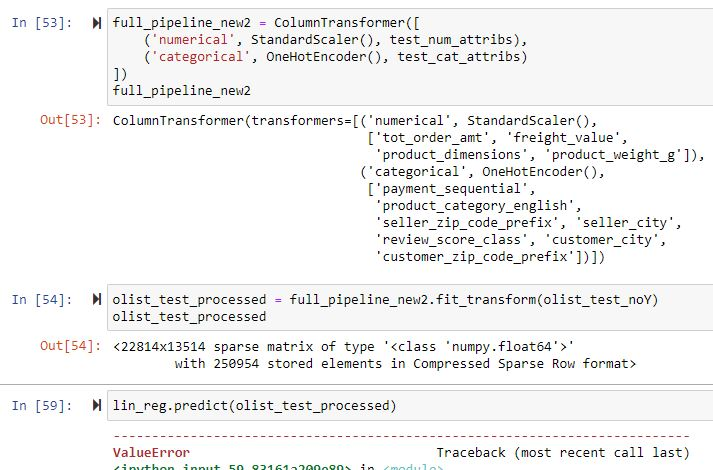 width="50" height="10>                                                                                          
                                   

##### Error message                                                                   
                                                                       
<img scrc=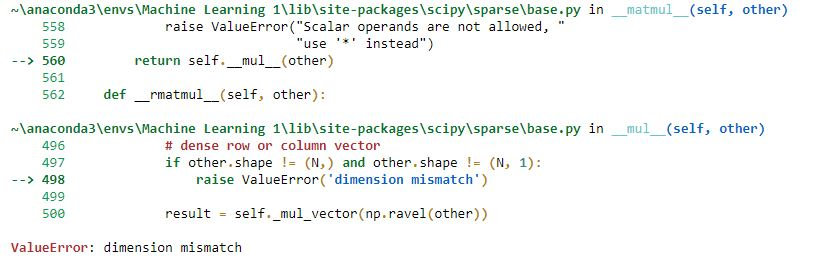 width="50" height="10>


**MY OWN WORDS OF INTERPRETATION**<br>
I believe the column mismatch error could be due to the one hot encoding technique encoding that generated different number of columns for train and test sets.
I used the approach of Kyle Gilde (https://www.kaggle.com/kylegilde/building-columntransformers-dynamically) and it solved this problem.

- This approach separated high cardinal attributes (attributes with numerous levels, set to a threshold of 10 in this project) from low cardinal one (attributes with fewer than 10 levels in this project) .
    - High cardinal attributes are those with significant number of levels (for instance, Product_category in the dataset with 73 levels.)
    - In this approach, the popular OneHotEncoding() (OHE) was used to transform the two low cardinal attributes.
    - The Generalized Linear Mixed Model Encoder (GLMME) was used to transform the high cardinal attributes.
        - The GLMME also encodes each level of the categorical varible much like OHE but rather than return  0,1 dummy variables, its sci-kit learn documentation (http://contrib.scikit-learn.org/category_encoders/_modules/category_encoders/glmm.html) GLMME utilizes well grounded statistical computations to encode the variables. Such statistical cumputation include accounting for mixed effects.
        - Its documentation also states that there are no hyper-parameter to tune which makes it simple to use. 
        - Still on the well- grounded statistical theory, GLMME is an extension of such generalized linear models like the logistic regression (source: Institute for Digital Research and Education, UCLA. https://stats.idre.ucla.edu/other/mult-pkg/introduction-to-generalized-linear-mixed-models/). 



In [46]:
import multiprocessing


In [47]:
#my custom function to select numerical attributes
def my_num_columns(df):
    num_attribute = [i for i in df.columns if (df.loc[:,i].dtypes in ['int8','int64', 'float64'])]
    
    return num_attribute

#test my function
delivery_num_features = my_num_columns(delivery_train_noY)


print(len(delivery_num_features)), print(delivery_num_features)

11
['payment_sequential', 'payment_installments', 'freight_value', 'product_weight_g', 'tot_order_amt', 'product_dimensions', 'purchase_year', 'purchase_hour', 'purchase_month_num', 'purchase_day_num', 'review_score_class_num']


(None, None)

In [48]:
#my custom function to select low cardinality attributes
#threshold is 10 levels
def my_lc_columns(df):
    lc_attributes = [i for i in df.columns if df.loc[:,i].nunique()< 10 and (df.loc[:,i].dtypes not in ['int8','int64', 'float64'])]
    
    return lc_attributes


#test my function
delivery_lc_features = my_lc_columns(delivery_train_noY)


print(len(delivery_lc_features)), print(delivery_lc_features)
    

2
['payment_type', 'purchase_wk_day']


(None, None)

In [49]:
oh_pipeline1 = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

In [50]:
def my_hc_columns(df):
    hc_attribute = [i for i in df.columns if df.loc[:,i].nunique()> 10 and (df.loc[:,i].dtypes not in ['int8','int64', 'float64'])]
    
    return hc_attribute

delivery_hc_features = my_hc_columns(delivery_train_noY)


print(len(delivery_hc_features)), print(delivery_hc_features)

4
['customer_zip_code_prefix', 'product_category_english', 'seller_zip_code_prefix', 'purchase_month']


(None, None)

In [51]:
#Standard default scaler for numeric variables.
numeric_pipeline = make_pipeline(StandardScaler()) 

**ColumnTransformer**  
- Transformation functions such as standardscaler() should be applied to train and test SEPARATELY,  
    - that is why custom function was utilized the custom function to select features.  
        - So the ColumnTransformer pipeline is now a 'generic' pipeline that works INDEPENDENTLY on train and test.

In [52]:
import category_encoders as ce
hc_pipeline = make_pipeline(ce.GLMMEncoder())

In [53]:
fullpipeline_simple = ColumnTransformer(transformers=\
                                       [('numeric_pipeline', numeric_pipeline, my_num_columns),\
                                        ('oh_pipeline', oh_pipeline1, my_lc_columns),\
                                         ('hc_pipeline', hc_pipeline, my_hc_columns)],                                       
                                       remainder='drop')

Here we use the OHE and GLMME methods to transform the dataset.

Note that GLMME documentation (https://contrib.scikit-learn.org/category_encoders/glmm.html) states that:  
"""  
*When the data are used for model training, it is important to also pass the target in order to apply leave one out.*  
"""

In [54]:
#Make Y classification
delivery_X_train_class = fullpipeline_simple.fit_transform(delivery_train_noY, delivery_train_y)
delivery_X_test_class = fullpipeline_simple.transform(delivery_test_noY)

C:\Users\justi\anaconda3\envs\ML\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [55]:
type(delivery_X_train_class)

numpy.ndarray

In [56]:
#sanity check
delivery_X_train_class

array([[-0.13530505, -0.69635631, -0.15261799, ..., -0.2315937 ,
         2.63742664,  1.12467263],
       [-0.13530505, -0.33016824, -0.13048404, ...,  0.12133846,
        -0.32240561, -0.98097871],
       [-0.13530505, -0.69635631, -0.30186409, ..., -0.46149886,
        -0.68589854, -3.65745596],
       ...,
       [-0.13530505, -0.69635631, -0.27846534, ...,  0.26472129,
         1.89578621, -2.37985242],
       [-0.13530505,  0.76839597, -0.56494196, ...,  0.62810346,
         3.38397337,  1.12467263],
       [-0.13530505,  0.4022079 ,  1.1893321 , ...,  7.72137663,
        10.09448694,  2.29518213]])

**Pre-processed**    
- The number of columns have now increased from 13 to 36  
- My thought is that ohe() added columns for each level of its transformed attributes.   
- GLMME did not create additional columns, rather, its columns were transformed in place.  

The length of the transformed dataset must be the same as that of the original dataset. 

In [57]:
print(delivery_X_train_class.shape)
print(delivery_X_test_class.shape)

(72140, 26)
(30918, 26)


### NaN in transformed data - %DOUBLE CHECK THIS SECTION

- I ran my model on the pre-processed set that resulted from ColumnTransformation.
    - There was an error about NaN, infinity input values, so I figured there were NaNs in the processed dataset.
    - I used imputation to fix NaNs.

In [58]:
#Where the Nans occurred
np.argwhere(np.isnan(delivery_X_train_class))

array([], shape=(0, 2), dtype=int64)

In [59]:
#Finding the NaN values
# create dataframe
delivery_X_train_diff = pd.DataFrame(delivery_X_train_class)

In [60]:
delivery_X_train_diff.isnull().sum().sum()

0

In [61]:
#Checking out the NaNs
delivery_X_train_diff.iloc[76265:76272,3:6]

,3,4,5


**Investigating source of NaN**
- Let us take a look at the original dataset to see if there is any issues with raw data
- There is nothing unusual in the  raw data of those transformation that resulted in NaN
- This requires further exploration that will focus on the *ce* package source algorithm for glmmEncoder.
    - But for now we can impute the two NaN values with mean of their respective columns.
    - Any method used to handle these 2 NaNs should be inconsequential since they are very few in this case.  

In [62]:
delivery_train_noY.iloc[76265:76272,3:6]

,payment_installments,freight_value,product_weight_g


In [63]:

#Simple Imputer for the NaNs in ColumnTransform dataset
#imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
#imputer=imputer.fit(delivery_X_train_class)
#delivery_X_train_class1=imputer.transform(delivery_X_train_class)

## <span style='color:red'> Task 2 - Review Scores </span> 

In [64]:
review_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103058 entries, 0 to 114066
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   customer_zip_code_prefix       103058 non-null  category
 1   payment_sequential             103058 non-null  float64 
 2   payment_type                   103058 non-null  category
 3   payment_installments           103058 non-null  float64 
 4   freight_value                  103058 non-null  float64 
 5   product_weight_g               103058 non-null  float64 
 6   product_category_english       103058 non-null  category
 7   seller_zip_code_prefix         103058 non-null  category
 8   tot_order_amt                  103058 non-null  float64 
 9   purchase_wk_day                103058 non-null  category
 10  purchase_month                 103058 non-null  category
 11  product_dimensions             103058 non-null  float64 
 12  purchase_year   

In [65]:
#Move the target response to the last column
review_model["review_scor_class_num"] = review_model["review_score_class_num"]
review_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103058 entries, 0 to 114066
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   customer_zip_code_prefix       103058 non-null  category
 1   payment_sequential             103058 non-null  float64 
 2   payment_type                   103058 non-null  category
 3   payment_installments           103058 non-null  float64 
 4   freight_value                  103058 non-null  float64 
 5   product_weight_g               103058 non-null  float64 
 6   product_category_english       103058 non-null  category
 7   seller_zip_code_prefix         103058 non-null  category
 8   tot_order_amt                  103058 non-null  float64 
 9   purchase_wk_day                103058 non-null  category
 10  purchase_month                 103058 non-null  category
 11  product_dimensions             103058 non-null  float64 
 12  purchase_year   

In [66]:
#Remove columns that are recoded.
review_model.drop(columns=['review_score_class_num'], inplace =True)
review_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103058 entries, 0 to 114066
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   customer_zip_code_prefix       103058 non-null  category
 1   payment_sequential             103058 non-null  float64 
 2   payment_type                   103058 non-null  category
 3   payment_installments           103058 non-null  float64 
 4   freight_value                  103058 non-null  float64 
 5   product_weight_g               103058 non-null  float64 
 6   product_category_english       103058 non-null  category
 7   seller_zip_code_prefix         103058 non-null  category
 8   tot_order_amt                  103058 non-null  float64 
 9   purchase_wk_day                103058 non-null  category
 10  purchase_month                 103058 non-null  category
 11  product_dimensions             103058 non-null  float64 
 12  purchase_year   

In [67]:
#train test split
#set the random state. Stratify based on review_score _class. see explanation above 

review_train, review_test = train_test_split(review_model, test_size=0.3,random_state=42, 
                                           stratify = review_model.review_scor_class_num)

In [68]:
#Proportions of class in the review_score_class attribute in the TRAIN SET
review_train['review_scor_class_num'].value_counts()/len(review_train)

2    0.775936
0    0.139867
1    0.084197
Name: review_scor_class_num, dtype: float64

In [69]:
#Proportions of class in the review_score_class attribute in the main dataset
review_model['review_scor_class_num'].value_counts()/len(review_model)

2    0.775932
0    0.139873
1    0.084195
Name: review_scor_class_num, dtype: float64

In [70]:
#Proportions of class in the review_score_class attribute in the TEST SET
review_test['review_scor_class_num'].value_counts()/len(review_test)

2    0.775923
0    0.139886
1    0.084190
Name: review_scor_class_num, dtype: float64

### Drop target variable (review_score_class_num)

In [71]:
# Separate the target variable from the training dataset
review_train_y = review_train.review_scor_class_num
len(review_train_y)

72140

In [72]:
#drop target variable from training set
review_train_noY = review_train.copy().drop(columns=['review_scor_class_num'])
review_train_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72140 entries, 29410 to 48553
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   customer_zip_code_prefix       72140 non-null  category
 1   payment_sequential             72140 non-null  float64 
 2   payment_type                   72140 non-null  category
 3   payment_installments           72140 non-null  float64 
 4   freight_value                  72140 non-null  float64 
 5   product_weight_g               72140 non-null  float64 
 6   product_category_english       72140 non-null  category
 7   seller_zip_code_prefix         72140 non-null  category
 8   tot_order_amt                  72140 non-null  float64 
 9   purchase_wk_day                72140 non-null  category
 10  purchase_month                 72140 non-null  category
 11  product_dimensions             72140 non-null  float64 
 12  purchase_year               

In [73]:
# Separate the target variable from the test dataset
review_test_y = review_test.review_scor_class_num
len(review_test_y)


30918

In [74]:
#drop target variable from test set
review_test_noY = review_test.copy().drop('review_scor_class_num', axis=1)
review_test_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30918 entries, 70280 to 20385
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   customer_zip_code_prefix       30918 non-null  category
 1   payment_sequential             30918 non-null  float64 
 2   payment_type                   30918 non-null  category
 3   payment_installments           30918 non-null  float64 
 4   freight_value                  30918 non-null  float64 
 5   product_weight_g               30918 non-null  float64 
 6   product_category_english       30918 non-null  category
 7   seller_zip_code_prefix         30918 non-null  category
 8   tot_order_amt                  30918 non-null  float64 
 9   purchase_wk_day                30918 non-null  category
 10  purchase_month                 30918 non-null  category
 11  product_dimensions             30918 non-null  float64 
 12  purchase_year               

**Preprocessing**
- This will follow the same process as before. 
- The cited references for the previous section equaly applies here.
- Pipeline using StandardScaler


In [75]:
#Standard default scaler for numeric variables.
numeric_pipeline = make_pipeline(StandardScaler()) 

In [76]:
oh_pipeline1 = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

In [77]:
import category_encoders as ce
hc_pipeline = make_pipeline(ce.GLMMEncoder())

In [78]:
# reuse custome functions
review_num_features = my_num_columns(review_train_noY)
review_lc_features = my_lc_columns(review_train_noY)
review_hc_features = my_hc_columns(review_train_noY)

print(len(review_num_features)), print(review_num_features)
print(len(review_lc_features)), print(review_lc_features)
print(len(review_hc_features)), print(review_hc_features)

11
['payment_sequential', 'payment_installments', 'freight_value', 'product_weight_g', 'tot_order_amt', 'product_dimensions', 'purchase_year', 'purchase_hour', 'purchase_month_num', 'purchase_day_num', 'order_deliver_actual_duration']
2
['payment_type', 'purchase_wk_day']
4
['customer_zip_code_prefix', 'product_category_english', 'seller_zip_code_prefix', 'purchase_month']


(None, None)

In [79]:
fullpipeline_rs = ColumnTransformer(transformers=\
                                       [('numeric_pipeline', numeric_pipeline, my_num_columns),\
                                        ('oh_pipeline', oh_pipeline1, my_lc_columns),\
                                         ('hc_pipeline', hc_pipeline, my_hc_columns)],                                       
                                       remainder='drop')

In [80]:
#Make Y classification
review_X_train_rs = fullpipeline_rs.fit_transform(review_train_noY, review_train_y)
review_X_test_rs = fullpipeline_rs.transform(review_test_noY)

C:\Users\justi\anaconda3\envs\ML\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [81]:
print(review_X_train_rs.shape)
print(review_X_train_rs.shape)
print(review_X_test_rs.shape)

(72140, 26)
(72140, 26)
(30918, 26)


**Handling NaN**
-The same NaNs are also recorded here so we use the same imputation method we used before.
%CHECK THIS


In [82]:
#Where the Nans occurred
np.argwhere(np.isnan(review_X_train_rs))

array([], shape=(0, 2), dtype=int64)

In [83]:
#Simple Imputer for the NaNs in ColumnTransform dataset
#imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
#imputer=imputer.fit(review_X_train_rs)
#review_X_train_rs1=imputer.transform(review_X_train_rs)

## <span style='color:red'> Task 3 - Payment Method </span>



In [84]:
# remove the response variable - payment_method
payment_y = copy.deepcopy(payment_model.payment_type)
payment_X = copy.deepcopy(payment_model.drop(columns=['payment_type']))

print('\nX shape:',payment_X.shape)
print('\ny shape:',payment_y.shape,'\n')

print('Distribution of y:\n',payment_y.value_counts())

print('\n=====================\npayment_X\n=====================\n')
payment_X.info()



X shape: (103058, 17)

y shape: (103058,) 

Distribution of y:
 credit_card    76349
boleto         19563
voucher         5630
debit_card      1516
Name: payment_type, dtype: int64

payment_X

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103058 entries, 0 to 114066
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   customer_zip_code_prefix       103058 non-null  category
 1   payment_sequential             103058 non-null  float64 
 2   payment_installments           103058 non-null  float64 
 3   freight_value                  103058 non-null  float64 
 4   product_weight_g               103058 non-null  float64 
 5   product_category_english       103058 non-null  category
 6   seller_zip_code_prefix         103058 non-null  category
 7   tot_order_amt                  103058 non-null  float64 
 8   purchase_wk_day                103058 non-null  category
 9   purchase

In [85]:
payment_X.drop(columns=['purchase_wk_day', 'purchase_month'], inplace=True)
payment_X.rename(columns={'purchase_month_num':'purchase_month','purchase_day_num':'purchase_day'}, inplace=True)

In [86]:
payment_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103058 entries, 0 to 114066
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   customer_zip_code_prefix       103058 non-null  category
 1   payment_sequential             103058 non-null  float64 
 2   payment_installments           103058 non-null  float64 
 3   freight_value                  103058 non-null  float64 
 4   product_weight_g               103058 non-null  float64 
 5   product_category_english       103058 non-null  category
 6   seller_zip_code_prefix         103058 non-null  category
 7   tot_order_amt                  103058 non-null  float64 
 8   product_dimensions             103058 non-null  float64 
 9   purchase_year                  103058 non-null  int64   
 10  purchase_hour                  103058 non-null  int64   
 11  purchase_month                 103058 non-null  int64   
 12  purchase_day    

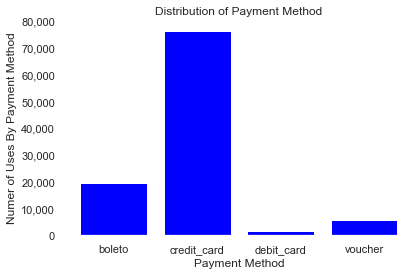

In [87]:
#### plot the distribution of y

f, ax = plt.subplots(figsize=(6,4), tight_layout=True)

labels, counts = np.unique(payment_y, return_counts=True)
ax.bar(labels, counts, align='center', color='blue')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to the yaxis ticks
ax.set_facecolor('white')

plt.title('Distribution of Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Numer of Uses By Payment Method')

plt.show()



In [88]:
payment_X.shape, payment_y.shape

((103058, 15), (103058,))

##### StratifiedShuffleSplit Train/Test
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html?highlight=stratifiedshufflesplit#sklearn.model_selection.StratifiedShuffleSplit

In [89]:
# train/ test split
import random

random.seed(42) 
np.random.seed(42)

cv = StratifiedShuffleSplit(n_splits=1,test_size = 0.3, train_size = 0.7, random_state=42) 

print(cv)
print(cv.get_n_splits(payment_X, payment_y))

# fill in the training and testing data and save as separate variables
for trainidx, testidx in cv.split(payment_X, payment_y):
    # using a dataframe we need to reference the rows using pd.iloc[] notation
    # if we were using a numpy array or sparse matrix, we would be able to just use X[<index>]
    payment_X_train, payment_X_test = payment_X.iloc[trainidx], payment_X.iloc[testidx] 
    payment_y_train, payment_y_test = payment_y.iloc[trainidx], payment_y.iloc[testidx]


StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.3,
            train_size=0.7)
1


In [90]:
print('Let\'s take a look at how our training/ test splits came out:\n')

print('payment_X_train.shape:',payment_X_train.shape, '\npayment_X_test.shape:',payment_X_test.shape)
print('payment_y_train.shape:',payment_y_train.shape, '\npayment_y_test.shape:',payment_y_test.shape)

Let's take a look at how our training/ test splits came out:

payment_X_train.shape: (72140, 15) 
payment_X_test.shape: (30918, 15)
payment_y_train.shape: (72140,) 
payment_y_test.shape: (30918,)


In [91]:
# use SelectKBest from Sklearn to get an idea of best features
random.seed(42)
np.random.seed(42)

numeric = list(payment_X_train.select_dtypes(include=['float64','int64','int8']).columns)
categorical = list(payment_X_train.select_dtypes('category'))

# categorical column selector
ordinal = Pipeline([('selector_cat', FunctionTransformer(lambda train: train.loc[:,categorical])), 
                    ('enc', OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=-1))])

# numerical column selector
scaler = Pipeline([('selector_num', FunctionTransformer(lambda train: train.loc[:,numeric])), 
                    ('standscale', StandardScaler())])

# join the columns backtogether
features = FeatureUnion([("ordinal", ordinal),
                             ("scaler", scaler)])
preprocessor = Pipeline([('features', features),
                         ('minmax', MinMaxScaler())])

preprocessor.fit(payment_X_train)
payment_X_train_proc = preprocessor.transform(payment_X_train)
payment_X_test_proc = preprocessor.transform(payment_X_test)

# convert the resonse variables into numeric values using LabelEncoder 
le = LabelEncoder()
le.fit(payment_y_train)
payment_y_train_proc = le.transform(payment_y_train)
payment_y_test_proc = le.transform(payment_y_test)

skb = SelectKBest(chi2, k=11)  
skb.fit(payment_X_train_proc, payment_y_train_proc)
payment_X_train_feats = skb.transform(payment_X_train_proc)
payment_X_test_feats = skb.transform(payment_X_test_proc)

# create a dataframe matching feature names to chi^2 scores
cols = np.array(payment_X.columns)
pd.options.display.float_format = '{:.2f}'.format # remove that pesky scientific notation
feat_scores = pd.DataFrame({'feature':cols, 'score':skb.scores_, 'p_values': skb.pvalues_})

# sort by score values in descending order
feat_scores.sort_values(by = ['score'], axis=0, ascending=False, inplace=True, ignore_index=True)

# print out feature chi^2 scores
print(feat_scores)

                          feature   score  p_values
0                   freight_value 4054.29      0.00
1                product_weight_g 2075.45      0.00
2                    purchase_day   32.88      0.00
3                   purchase_year   20.76      0.00
4        customer_zip_code_prefix   17.94      0.00
5                   purchase_hour   12.33      0.01
6                   tot_order_amt    8.84      0.03
7          seller_zip_code_prefix    7.30      0.06
8              product_dimensions    5.77      0.12
9              payment_sequential    5.51      0.14
10           payment_installments    3.55      0.31
11         review_score_class_num    1.85      0.60
12                 purchase_month    1.20      0.75
13  order_deliver_actual_duration    1.19      0.76
14       product_category_english    1.07      0.78


In [92]:
payment_X_train_feats.shape, payment_X_test_feats.shape

((72140, 11), (30918, 11))

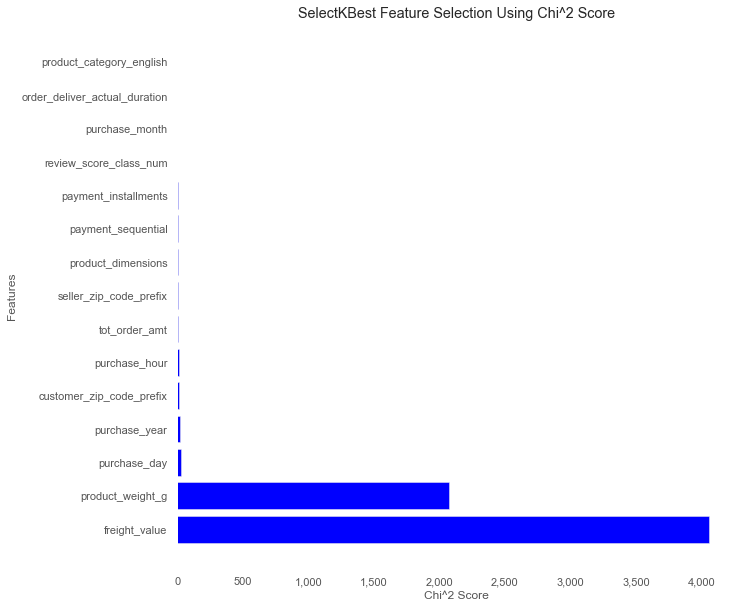

In [93]:
# let's also plot the scores to get a visual sense of what features are deemed most important

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,10))

ft = feat_scores.feature
width = feat_scores.score

ax.barh(ft, width=width, align='center', color='blue')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) # add commas in the x axis numbers
ax.set_facecolor('white')
ax.set_yticks(ft)
ax.set_yticklabels(ft)

plt.title('SelectKBest Feature Selection Using Chi^2 Score')
plt.ylabel('Features')
plt.xlabel('Chi^2 Score')
plt.show()



#Note I want to keep the top 10, so we will rerun this using k=15 to get our X_train_feats/ X_test_feats with 10 features

# <span style='color:blue'>Modeling and Evaluation 3</span>
<span style='color:blue'>* [20 points] Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!</span>

## <span style='color:red'> Task 1: Delivery Date </span>

**MODELS:**
1. SGD Regressor?
2. Random Forest Regression?
3. Gaussian Naive Bayes? XGBoost?

### SGD Model?

In [94]:
#test preprocessed on linear regression and see what happens
lin_reg = LinearRegression()

In [95]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)

### Random Forest Model

In [96]:

rnd_reg = RandomForestRegressor(n_estimators=1000, max_leaf_nodes=10, n_jobs=-1, random_state=42)

### XGBoost

- Extreme Gradient Boosting (XGBoost) is a lighter version of Gradient Boosting. 
- Gradient Boosting works by adding base predictors to an ensemble and much like AdaBoost, it also corrects its predecessor. 
- The main difference is that AdaBoost modifies the weights of instances (increases mis-classified instances) while Gradient Boosting relies on the residual error of the previous predictor to make correction for subsequent prediction.    

- Aurelion Geron, 2019: Hands on Machine Learning.

In [97]:
import xgboost
xgb_reg = xgboost.XGBRegressor(random_state=42)

In [98]:
myclf = [lin_reg,sgd_reg, rnd_reg, xgb_reg]

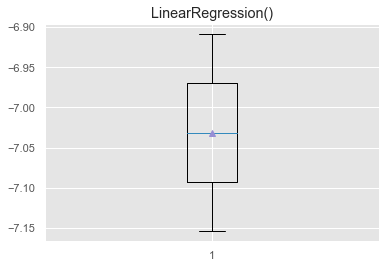

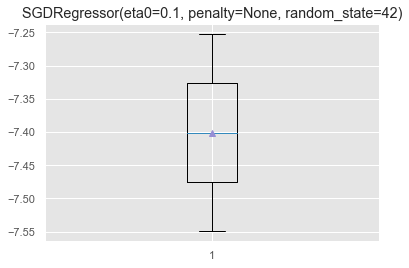

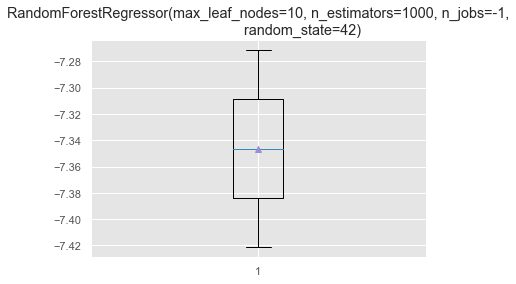

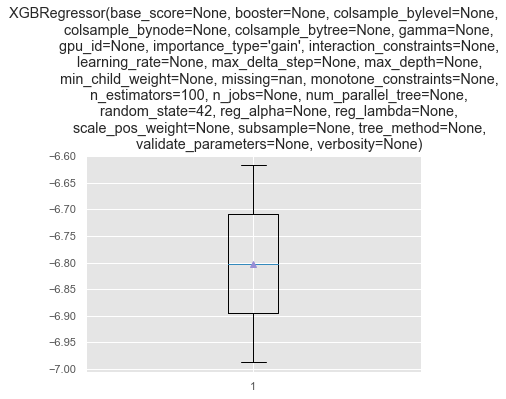

In [99]:
list_scores = []

for clf in myclf:
    scores = cross_val_score(clf, delivery_X_train_class, delivery_train_y,scoring='neg_root_mean_squared_error', cv=2, n_jobs=-1)
    list_scores.append(scores)    
    plt.boxplot(scores, showmeans=True)
    plt.title(clf)
    plt.show()    

In [100]:
#Sanity check to view the list of rmse scores
list_scores

[array([-6.90836948, -7.15424028]),
 array([-7.25214776, -7.54956191]),
 array([-7.27113362, -7.42149648]),
 array([-6.61597462, -6.98776768])]

In [101]:
#compare the 'raw' dataset with predicted
delivery_train_y.describe()


count   72140.00
mean       11.66
std         9.62
min        -7.00
25%         6.00
50%         9.00
75%        15.00
max       208.00
Name: order_deliver_actual_duration, dtype: float64

#### Implication of result  
- Looking at the boxplots shows results of each of the 5 folds cross-validated set:  
    - The best model is XGBoost and it predicted the actual delivery duration with mean rmse of 6.6 days.
        
- We were hoping to obtain rmse of 4 days but our best model is off by about 6.5 days. 
- Regardless:  
- This is a very good starting point for this project. It is better than the mean of 11 days in the original dataset.
- Also note that the data distribution is skewed and the Pearson correlation coeficient showed weak associations with response variable, yet we are able to get a reasonable prediction!.

- Next step will be to go back to acquire more attributes that will be more helpful for the prediction.  

- For this project:
    - To provide the best estimated delivery to the Olist management we should find important features produced by the model input their values in the model and add 6 or 7 days, as buffer, to its result.

## <span style='color:red'> Task 2 - Review Scores </span> 
- Predict review score
- Then generate feature importance from the best model/predictor to understand the features that best influence review score.

MODELS:
1. SGD Classifier
2. Random Forest Classifier
3. Gaussian Naive Bayes   
4. Ensemble Voting Classifier because it improves the accuracy of its predecessor

In [102]:
#test preprocessed on linear regression and see what happens
lin_reg = LinearRegression()

In [103]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)

In [104]:

rnd_reg = RandomForestRegressor(n_estimators=1000, max_leaf_nodes=10, n_jobs=-1, random_state=42)

In [105]:
#Sanity check to view the list of rmse scores
#list_scores

In [106]:
rnd_clf = RandomForestClassifier()
review_rnd_clf = rnd_clf.fit(review_X_train_rs, review_train_y)
review_y_test_pred_rf = review_rnd_clf.predict(review_X_test_rs)

In [107]:
accuracy_score(review_test_y, review_y_test_pred_rf)

0.7988550359014166

In [108]:
print(classification_report(review_test_y, review_y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.60      0.28      0.38      4325
           1       0.81      0.05      0.09      2603
           2       0.81      0.97      0.89     23990

    accuracy                           0.80     30918
   macro avg       0.74      0.43      0.45     30918
weighted avg       0.78      0.80      0.75     30918



In [109]:
#Logistic regression
logr_clf = LogisticRegression(penalty='l2', #default
                              C=1, #default 
                              class_weight='balanced', # use with imbalanced dataset
                              solver='newton-cg', # only solver that works with this dataset
                              multi_class='multinomial', 
                              random_state=42) 

review_logr_clf = logr_clf.fit(review_X_train_rs, review_train_y)
review_y_test_pred_logr = review_logr_clf.predict(review_X_test_rs)

In [110]:
sgd_clf = SGDClassifier(random_state=42)
review_sgd_clf = sgd_clf.fit(review_X_train_rs, review_train_y)
review_y_test_pred_sgd = review_sgd_clf.predict(review_X_test_rs)

In [111]:
print(classification_report(review_test_y, review_y_test_pred_logr))

              precision    recall  f1-score   support

           0       0.31      0.43      0.36      4325
           1       0.10      0.28      0.15      2603
           2       0.85      0.63      0.73     23990

    accuracy                           0.58     30918
   macro avg       0.42      0.45      0.41     30918
weighted avg       0.71      0.58      0.63     30918



In [112]:
print(classification_report(review_test_y, review_y_test_pred_sgd))

              precision    recall  f1-score   support

           0       0.66      0.14      0.23      4325
           1       0.00      0.00      0.00      2603
           2       0.79      0.99      0.88     23990

    accuracy                           0.79     30918
   macro avg       0.48      0.38      0.37     30918
weighted avg       0.71      0.79      0.72     30918



C:\Users\justi\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\justi\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\justi\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
#myclf = [logr_clf,sgd_clf, rnd_clf]

#### Ensemble voting classifier

In [114]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=42)
clf2 = RandomForestClassifier(n_estimators=500, random_state=42)
clf3 = GaussianNB()



- Based on previous classification, I believe Logistic regression has been doing very good in this project so I give its weight a 2.  
**Ensemble Voting methods**

Each base classifier is always trying to 'correct' it s predecessor.
- Therefore, a set of 'average predictors yields higher performance metrics.

**Gaussian Naive Bayes**
- After the transformation using GLMME and standardscaler, it looks like Gaussian Naive Bayes will work with the dataset.
- complementNB() and MultinomialNB() yielded error about negative values in training set.
- These negative values resulted from the GLMMEncoding transformation.



In [115]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
                        voting='soft', weights=[1,1,1])
eclf = eclf.fit(review_X_train_rs, review_train_y)
review_y_test_pred_vote= eclf.predict(review_X_test_rs)

C:\Users\justi\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:
print(classification_report(review_test_y, review_y_test_pred_vote))

              precision    recall  f1-score   support

           0       0.51      0.28      0.36      4325
           1       0.75      0.00      0.01      2603
           2       0.81      0.96      0.88     23990

    accuracy                           0.79     30918
   macro avg       0.69      0.42      0.42     30918
weighted avg       0.76      0.79      0.73     30918



---
## <span style='color:red'> Task 3 - Payment Method </span>

**MODELS:**
1. KNN
2. Naive Bayes
3. Random Forest
---


### KNN Classification Model

#### Model Selection KNN with reduced features using Cross Validation</span>
https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation  
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [117]:
import random
import math
random.seed(42)
np.random.seed(42)

# generate some values of K
random_k = random.sample(range(50,200), 7)
purpose_k = list(range(1,28,7))
k_list = purpose_k + random_k + [round(math.sqrt(len(payment_X_train)))] # sqrt(N) is considered the best value of K
k_list.sort()
print('List of n_neighbors to test: %s' %(k_list))

# calculate f-measures
f_score_u = []
f_score_d = []
for k in k_list:
    percent_complete = k_list.index(k)/len(k_list)*100
    print(format(percent_complete, "^03.1f"),'% complete and is now testing k =', k)
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean', n_jobs=-1)
    scores = cross_val_score(knn, payment_X_train_feats, payment_y_train_proc, cv = cv, scoring='f1_weighted')
    f_score_u.append(scores.mean())
    
    knn1 = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean', n_jobs=-1)
    scores1 = cross_val_score(knn1, payment_X_train_feats, payment_y_train_proc, cv = cv, scoring='f1_weighted')
    f_score_d.append(scores1.mean())
     


List of n_neighbors to test: [1, 8, 15, 22, 56, 76, 78, 85, 107, 112, 120, 269]
0.0 % complete and is now testing k = 1
8.3 % complete and is now testing k = 8
16.7 % complete and is now testing k = 15
25.0 % complete and is now testing k = 22
33.3 % complete and is now testing k = 56
41.7 % complete and is now testing k = 76
50.0 % complete and is now testing k = 78
58.3 % complete and is now testing k = 85
66.7 % complete and is now testing k = 107
75.0 % complete and is now testing k = 112
83.3 % complete and is now testing k = 120
91.7 % complete and is now testing k = 269


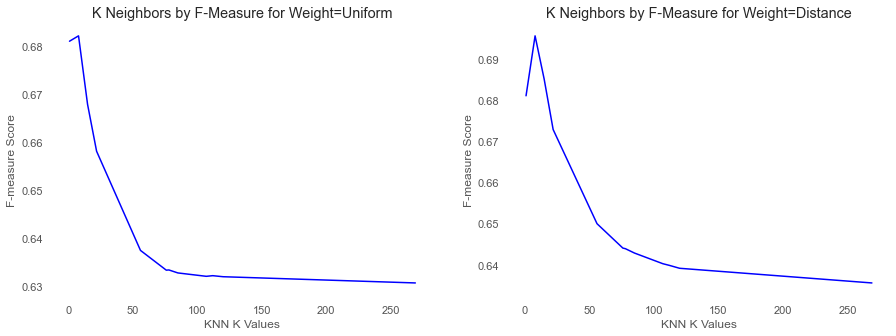


Results with Weight = Uniform
    K value  F-Measure
0         1       0.68
1         8       0.68
2        15       0.67
3        22       0.66
4        56       0.64
5        76       0.63
6        78       0.63
7        85       0.63
8       107       0.63
9       112       0.63
10      120       0.63
11      269       0.63

The best f1_measure with weight=uniform is: 0.682152 with 8 neighbors


Results with Weight = Distance
    K value  F-Measure
0         1       0.68
1         8       0.70
2        15       0.69
3        22       0.67
4        56       0.65
5        76       0.64
6        78       0.64
7        85       0.64
8       107       0.64
9       112       0.64
10      120       0.64
11      269       0.64

The best f1_measure with weight=distance is: 0.695587 with 8 neighbors

The better weight appears to be 'distance' with an f1_score of 0.695587 vs the 'uniform' f1_score of 0.682152


In [118]:
# plot the results
f, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(k_list, f_score_u, color='blue')
ax[0].set_facecolor('white')
ax[0].set_title('K Neighbors by F-Measure for Weight=Uniform')
ax[0].set_xlabel('KNN K Values')
ax[0].set_ylabel('F-measure Score')

ax[1].plot(k_list, f_score_d, color='blue')
ax[1].set_facecolor('white')
ax[1].set_title('K Neighbors by F-Measure for Weight=Distance')
ax[1].set_xlabel('KNN K Values')
ax[1].set_ylabel('F-measure Score')
plt.show()

print('========================================\n')
m_f1_u = max(f_score_u)
test_results_u = pd.DataFrame({"K value": k_list, "F-Measure": f_score_u})

m_f1_d = max(f_score_d)
test_results_d = pd.DataFrame({"K value": k_list, "F-Measure": f_score_d})

print('Results with Weight = Uniform')
print(test_results_u[['K value','F-Measure']])
print('========================================\n')
print('The best f1_measure with weight=uniform is: %f with %s neighbors' % (m_f1_u ,k_list[f_score_u.index(m_f1_u)]))
print('\n========================================\n')
print('Results with Weight = Distance')
print(test_results_d[['K value','F-Measure']])
print('========================================\n')
print('The best f1_measure with weight=distance is: %f with %s neighbors' % (m_f1_d ,k_list[f_score_d.index(m_f1_d)]))
print('========================================\n')
if m_f1_u>m_f1_d:
    print('The better weight appears to be \'uniform\' with an f1_score of %f vs the \'distance\' f1_score of %f' % (m_f1_u,m_f1_d))
else:
    print('The better weight appears to be \'distance\' with an f1_score of %f vs the \'uniform\' f1_score of %f' % (m_f1_d,m_f1_u))



In [119]:
# predictions
random.seed(42)
np.random.seed(42)

#using the n_neighbors and weights we deteremined work best above
knn_default = KNeighborsClassifier(n_jobs=-1) #defaults: k=5, weight=uniform, algo=auto, leaf_size=30
knn = KNeighborsClassifier(n_neighbors=8, weights='distance', metric='euclidean', n_jobs=-1)

f_scores = cross_val_score(knn, payment_X_train_feats, payment_y_train_proc, cv=10, scoring='f1_weighted')
knn.fit(payment_X_train_feats, payment_y_train_proc) # cross_val_score doesn't actually fit the model


# make predictions
payment_yhat1 = cross_val_predict(knn, payment_X_test_feats, payment_y_test_proc, cv=10)
f1_knn = f1_score(payment_y_test_proc, payment_yhat1, average=None)
acc_knn = accuracy_score(payment_y_test_proc, payment_yhat1)


In [120]:
for i in range(len(f_scores)):
    print('CV Fold %d F-measure: %f' %(i+1,f_scores[i]))
print('Mean F-measure: %f' % (np.mean(f_scores)))
print('Mean Accuracy %f' %(acc_knn))

CV Fold 1 F-measure: 0.705920
CV Fold 2 F-measure: 0.701452
CV Fold 3 F-measure: 0.700057
CV Fold 4 F-measure: 0.700869
CV Fold 5 F-measure: 0.709733
CV Fold 6 F-measure: 0.704419
CV Fold 7 F-measure: 0.702624
CV Fold 8 F-measure: 0.707677
CV Fold 9 F-measure: 0.701000
CV Fold 10 F-measure: 0.697882
Mean F-measure: 0.703163
Mean Accuracy 0.732357


### Naive Bayes Classification Model

https://scikit-learn.org/stable/modules/classes.html?highlight=bayes#module-sklearn.naive_bayes

In [121]:
# got ValueError: Negative values in data passed to CategoricalNB (input X)
# from online research, it was suggest to try to use MinMaxScaler() to preprocess train/test data so its between 0.1
# https://stackoverflow.com/questions/67224279/how-can-i-resolve-this-error-valueerror-negative-values-in-data-passed-to-m


# naive bayes using cv
payment_nb = CategoricalNB(alpha = 1.0, fit_prior=True)

# fit model
# scores_nb = cross_val_score(payment_nb, payment_X_train_feats, payment_y_train_proc)
# when attempting to use cross_val_score an error was generated:
# UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
# Traceback (most recent call last):
#  File "C:\Users\justi\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
#    scores = scorer(estimator, X_test, y_test)
#  File "C:\Users\justi\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_scorer.py", line 90, in __call__
#    score = scorer(estimator, *args, **kwargs)
#  File "C:\Users\justi\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
#    return estimator.score(*args, **kwargs)
#  File "C:\Users\justi\anaconda3\envs\ML\lib\site-packages\sklearn\base.py", line 500, in score
#    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
#  File "C:\Users\justi\anaconda3\envs\ML\lib\site-packages\sklearn\naive_bayes.py", line 75, in predict
#    jll = self._joint_log_likelihood(X)
#  File "C:\Users\justi\anaconda3\envs\ML\lib\site-packages\sklearn\naive_bayes.py", line 1303, in _joint_log_likelihood
#    jll += self.feature_log_prob_[i][:, indices].T
# IndexError: index 1 is out of bounds for axis 1 with size 1
#
# so this model was just tested without CV

# only tuning parameter is alpha
alpha = [0.1, 0.5, 1.0, 2.0, 5.0] # 1.0 is the default
f1_nb = pd.DataFrame()

for a in range(len(alpha)):
    payment_nb = CategoricalNB(alpha = a, fit_prior=True)
    payment_nb.fit(payment_X_train_feats, payment_y_train_proc)
    payment_yhat_nb = payment_nb.predict(payment_X_test_feats)
    f1_nb[a] = f1_score(payment_y_test_proc, payment_yhat_nb, average=None)

acc_nb = accuracy_score(payment_y_test_proc, payment_yhat_nb)


C:\Users\justi\anaconda3\envs\ML\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


In [122]:
np.mean

<function numpy.mean(a, axis=None, dtype=None, out=None, keepdims=<no value>, *, where=<no value>)>

In [123]:
for i in range(len(f1_nb)):
    print('CV Fold %d mean f-measure: %f' %(i+1,np.mean(f1_nb[i])))
print('Mean Accuracy:', acc_nb)

CV Fold 1 mean f-measure: 0.212775
CV Fold 2 mean f-measure: 0.212775
CV Fold 3 mean f-measure: 0.212775
CV Fold 4 mean f-measure: 0.212775
Mean Accuracy: 0.7407658968885439


### Random Forest Classification Model
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#
<br>

- To start we are going to reduce the dataset down to 15,000 total records to utilize sklearn's GridSearchCV to compare different settings for the RandomForestClassifer, then we will use those best_paramas to build a final RFClassifier and use those results to compare it to the other 2 models.


In [124]:
# we made a copy of the main data set above for this!
grids = grids.sample(n=15000, random_state=42)
print('grids dataframe shape:',grids.shape)

# export this sample to pickle to maintain integrity between systems running this code
#import pickle
#grids.to_pickle('lab2_downsample_dataset.pkl')

# to get this back from pickle in the future, assuming you are using the same ..\data\ file
#grids = pd.read_pickle('lab2_downsample_dataset.pkl') 

grids = grids.sample(n=15000, random_state=42)
grids.shape


# remove the response variable - payment_method
grids_y = copy.deepcopy(grids.payment_type)
grids_X = copy.deepcopy(grids.drop(columns=['payment_type']))

grids_X.drop(columns=['purchase_wk_day', 'purchase_month'], inplace=True)
grids_X.rename(columns={'purchase_month_num':'purchase_month','purchase_day_num':'purchase_day'}, inplace=True)

print('\n=====================Shapes=====================\n')
print('Original dataset shape:', grids.shape)
print('X shape:', grids_X.shape)
print('y shape:', grids_y.shape)


# train/ test split

cv = StratifiedShuffleSplit(n_splits=1,test_size = 0.3, train_size = 0.7, random_state=42) #note default is 10 splits!

random.seed(42)
np.random.seed(42)

print(cv)
print(cv.get_n_splits(grids_X, grids_y))

# fill in the training and testing data and save as separate variables
for trainidx, testidx in cv.split(grids_X, grids_y):
    # using a dataframe we need to reference the rows using pd.iloc[] notation
    # if we were using a numpy array or sparse matrix, we would be able to just use X[<index>]
    grids_X_train, grids_X_test = grids_X.iloc[trainidx], grids_X.iloc[testidx] 
    grids_y_train, grids_y_test = grids_y.iloc[trainidx], grids_y.iloc[testidx]

print('Let\'s take a look at how our training/ test splits came out:')
print(cv,'\nn_splits:', cv.get_n_splits(grids_X, grids_y))
print('X_train.shape:',grids_X_train.shape, 'X_test.shape:',grids_X_test.shape)
print('y_train.shape:',grids_y_train.shape, 'y_test.shape:',grids_y_test.shape)

grids dataframe shape: (15000, 18)

=====================Shapes=====================

Original dataset shape: (15000, 18)
X shape: (15000, 15)
y shape: (15000,)
StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.3,
            train_size=0.7)
1
Let's take a look at how our training/ test splits came out:
StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.3,
            train_size=0.7) 
n_splits: 1
X_train.shape: (10500, 15) X_test.shape: (4500, 15)
y_train.shape: (10500,) y_test.shape: (4500,)


In [125]:
grids_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 62674 to 106340
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   customer_zip_code_prefix       15000 non-null  category
 1   payment_sequential             15000 non-null  float64 
 2   payment_installments           15000 non-null  float64 
 3   freight_value                  15000 non-null  float64 
 4   product_weight_g               15000 non-null  float64 
 5   product_category_english       15000 non-null  category
 6   seller_zip_code_prefix         15000 non-null  category
 7   tot_order_amt                  15000 non-null  float64 
 8   product_dimensions             15000 non-null  float64 
 9   purchase_year                  15000 non-null  int64   
 10  purchase_hour                  15000 non-null  int64   
 11  purchase_month                 15000 non-null  int64   
 12  purchase_day               

In [126]:
# use SelectKBest from Sklearn to get an idea of best features
random.seed(42)
np.random.seed(42)

numeric = list(grids_X_train.select_dtypes(include=['float64','int64','int8']).columns)
categorical = list(grids_X_train.select_dtypes('category'))

# we made pipelines earlier!

preprocessor.fit(grids_X_train)
X_train_proc = preprocessor.transform(grids_X_train)
X_test_proc = preprocessor.transform(grids_X_test)

# convert the resonse variables into numeric values using LabelEncoder 
le = LabelEncoder()
le.fit(grids_y_train)
y_train_proc = le.transform(grids_y_train)
y_test_proc = le.transform(grids_y_test)

skb = SelectKBest(chi2, k=11)  
skb.fit(X_train_proc,y_train_proc)
X_train_feats = skb.transform(X_train_proc)
X_test_feats = skb.transform(X_test_proc)

# create a dataframe matching feature names to chi^2 scores
cols = np.array(grids_X.columns)
pd.options.display.float_format = '{:.2f}'.format # remove that pesky scientific notation
feat_scores = pd.DataFrame({'feature':cols, 'score':skb.scores_, 'p_values': skb.pvalues_})

# sort by score values in descending order
feat_scores.sort_values(by = ['score'], axis=0, ascending=False, inplace=True, ignore_index=True)

# print out feature chi^2 scores
print(feat_scores)

                          feature  score  p_values
0                   freight_value 649.92      0.00
1                product_weight_g 311.14      0.00
2                    purchase_day   5.80      0.12
3                   purchase_hour   3.75      0.29
4          seller_zip_code_prefix   3.56      0.31
5                   purchase_year   2.87      0.41
6                   tot_order_amt   2.42      0.49
7            payment_installments   2.42      0.49
8              product_dimensions   2.00      0.57
9              payment_sequential   1.37      0.71
10       customer_zip_code_prefix   1.15      0.77
11         review_score_class_num   0.43      0.93
12       product_category_english   0.35      0.95
13  order_deliver_actual_duration   0.11      0.99
14                 purchase_month   0.05      1.00


In [127]:
# these results are slightly different than what we had above, but the same features are in the top 11 or 0-10 so we are ok!


##### <span style='color:orange'><u>Model Selection Random Forest with reduced features tuned with GridSearch</u></span>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV

In [128]:

random.seed(42)
np.random.seed(42)
# code adopted from:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

parameters = {'n_estimators':[100,150,200],
              'criterion':['gini','entropy'],
              'min_samples_split' : [2,10,25],
              'min_samples_leaf': [1,5,10],
              'max_features': [2,3,5]}
   

gs = GridSearchCV(rfc, param_grid = parameters, cv=10)

gs.fit(X_train_feats, y_train_proc)


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [2, 3, 5],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 25],
                         'n_estimators': [100, 150, 200]})

In [129]:
# how long did the gridsearch take?
mft = gs.cv_results_['mean_fit_time']
mst = gs.cv_results_['mean_score_time']
ns = gs.n_splits_  # no splits for training data
ni = pd.DataFrame(gs.cv_results_).shape[0] #iterations per split
mins = (np.mean(mft + mst) *ns *ni)/60
print('The GridSearchCV took %f minutes to complete.' %(mins))


The GridSearchCV took 8.634342 minutes to complete.


In [130]:
gs

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [2, 3, 5],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 25],
                         'n_estimators': [100, 150, 200]})

In [131]:
from joblib import dump, load

best_params = gs.best_params_
print(type(best_params))
print(best_params)

# save parameters

#dump(gs.best_params_, 'best_params_RandomForestClassifier.joblib', )
#gs.best_params_ = load('best_params_RandomForestClassifier.joblib')

<class 'dict'>
{'criterion': 'entropy', 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 25, 'n_estimators': 150}


---
## <span style='color:orange'><u>Now Run </u></span><span style='color:red'><u>RandomForestClassifier </u></span><span style='color:orange'><u>using the full dataset!</u></span>
---

In [132]:

import sklearn.metrics as mt
random.seed(42)
np.random.seed(42)

# keep in mind our data was preprocessed and scaled for previous tests!

rfc = RandomForestClassifier(n_estimators = 150, criterion = 'entropy',
                             min_samples_split = 2, min_samples_leaf = 10,
                             max_features = 5, random_state=42)

f_scores_rfc = cross_val_score(rfc, payment_X_train_feats, payment_y_train_proc, cv=10, scoring='f1_weighted')

rfc.fit(payment_X_train_feats, payment_y_train_proc)
# make predictions
payment_yhat_rfc = cross_val_predict(rfc, payment_X_test_feats,payment_y_test_proc, cv=10)

payment_f1_rfc = f1_score(payment_y_test_proc, payment_yhat_rfc, average=None)
acc_rfc = accuracy_score(payment_y_test_proc, payment_yhat_rfc)

labels = ['boleto','credit_card','debit_card','voucher']
payment_conf_rfc = mt.confusion_matrix(le.inverse_transform(payment_y_test_proc), 
                                       le.inverse_transform(payment_yhat_rfc), 
                                       labels=labels)






# <span style='color:blue'>Modeling and Evaluation 4</span>
<span style='color:blue'>* [10 points] Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.</span>

## <span style='color:red'> Task 1 - Review Scores </span> 

The F1 score is a good measure of a model that performed well on the minority class. In our case we are very interested in the minority class because we want to know the aspects of the transaction to improve for review score.

- Here the F1 Logistic regression is similar (0.38 versus 0.36) to the Ensemble voting classifier. But overall the Logistic regression peformed bettr because it was able to produce recall for the class 1. The model was able to to correctly classify (i.e. precision = 0.28) the review score class 1 (i.e. fair).


## <span style='color:red'> Task 2 - Delivery Date </span>

#### Implication of result  
- Looking at the boxplots shows results of each of the 5 folds cross-validated set:  
    - The best model is XGBoost and it predicted the actual delivery duration with mean rmse of 6.6 days.
        
- We were hoping to obtain rmse of 4 days but our best model is off by about 6.5 days. 
- Regardless:  
- This is a very good starting point for this project. It is better than the mean of 11 days in the original dataset.
- Also note that the data distribution is skewed and the Pearson correlation coeficient showed weak associations with response variable, yet we are able to get a reasonable prediction!.

- Next step will be to go back to acquire more attributes that will be more helpful for the prediction.  

- For this project:
    - To provide the best estimated delivery to the Olist management we should find important features produced by the model input their values in the model and add 6 or 7 days, as buffer, to its result.

## <span style='color:red'> Task 3 - Payment Method </span>



### KNN Analysis and Visualization of Results

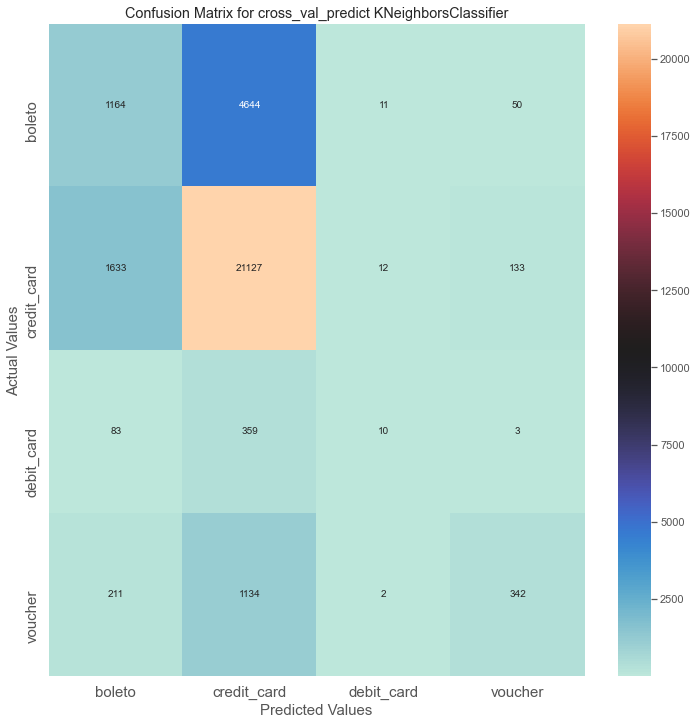

  payment_type  f1_measure
0       boleto        0.26
1  credit_card        0.84
2   debit_card        0.04
3      voucher        0.31

Mean F_measure: 0.7031632380449009


In [133]:
#create confusion matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://seaborn.pydata.org/tutorial/color_palettes.html

### sites about formatting strings in python ###
# https://pyformat.info/
# https://fmt.dev/latest/syntax.html#grammar-token-int_type

from sklearn import metrics as mt

labels = ['boleto','credit_card','debit_card','voucher']
payment_conf_knn1 = mt.confusion_matrix(le.inverse_transform(payment_y_test_proc), 
                                        le.inverse_transform(payment_yhat1), labels=labels)

# plot results in a heatmap
f, ax = plt.subplots(figsize=(12,12))

sns.heatmap(payment_conf_knn1, annot=True, fmt='g', ax=ax, cmap='icefire') 
# annot = put data in cell; fmt = how to format the in-chart labels; cmap = color

ax.set_xlabel('Predicted Values', size=15)
ax.set_ylabel('Actual Values', size=15)
ax.set_title('Confusion Matrix for cross_val_predict KNeighborsClassifier')
ax.xaxis.set_ticklabels(labels, size=15)
ax.yaxis.set_ticklabels(labels, size=15)
plt.show()

fmeasure_knn = pd.DataFrame({'payment_type':labels,'f1_measure': f1_knn})
print(fmeasure_knn)
print('\nMean F_measure: %s' %(np.mean(f_scores)))

#### **KNearestClassifier Predicted Chart Interpretation:**
This heatmap shows us the true positive and false positive results from running the predictions using KNN on our dataset. The diagonal numbers from the top-left to the bottom-right represent the true positive results using the predict function from cross_val_predict and a test set that was never shown to the model because it was held out prior to any pre-processing, but the pre-processing was replicated to ensure the test set was shaped the same as the training set.

Any other number on the verticle that is not a true positive is considered a false positive because if we look at the boleto column, boleto was correctlly predicted 1,164 times compared to being predicted 1,633 when the payment method was actually a credit card, 83 times when the payment method was a debit card and finally 211 times when the payment method was a voucher. So there were a total of 1,927 false positive guess for a boleto. 

Intuitively credit cards are the most widely used payment source, so it makes sense that they have the highest true positive matches (21,127 TP/ 27,264 total positives) and debit cards are the least used with similar results (10 TP/ 35  total positives). It also makes sense the model keeps trying to classify everything as a credit card since credit cards make up 74% of the payment method for the test set while debite cards are only 1.5% of the test set payment types.  

Here we see that the KNN model really didn't do great with the minority class, but it was able to at least identify some of them correctly with boleto having 1,164 correct predictions, debit cards 10 correct predictions and vouchers 342 correct preditions.

### Naive Bayes Analysis and Visualization of Results

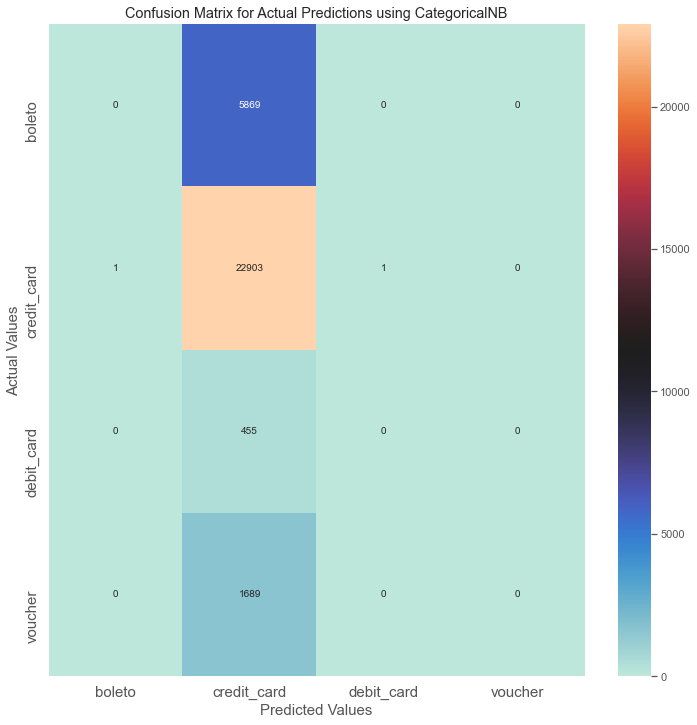

  payment_type  f1_measure
0       boleto        0.00
1  credit_card        0.85
2   debit_card        0.00
3      voucher        0.00
Mean F-measure: 0.212775
Mean Accuracy: 0.7407658968885439


In [134]:
# plot results in a heatmap
payment_conf_nb = mt.confusion_matrix(le.inverse_transform(payment_y_test_proc), le.inverse_transform(payment_yhat_nb), 
                                      labels=labels)

f, ax = plt.subplots(figsize=(12,12))

sns.heatmap(payment_conf_nb, annot=True, fmt='g', ax=ax, cmap='icefire')

ax.set_xlabel('Predicted Values', size=15)
ax.set_ylabel('Actual Values', size=15)
ax.set_title('Confusion Matrix for Actual Predictions using CategoricalNB')
ax.xaxis.set_ticklabels(labels, size=15)
ax.yaxis.set_ticklabels(labels, size=15)
plt.show()

fmeasure_nb = pd.DataFrame({'payment_type':labels,
                         'f1_measure': f1_nb[2]})
print(fmeasure_nb)
print('Mean F-measure: %f' %(np.mean(f1_nb[2])))
print('Mean Accuracy:', acc_nb)

#### **CategoricalNB Predicted Chart Interpretation:** 
NB in general does not have much in terms of paramter tuning, you can adjust the alpha so we tried that with a few values, but all yielded the same results. 

The confusion matrix above again shows us from the top-left to the bottom-right verticle the numer of true positives where only credit cards were ever predicted. So we have 22,903 correctly predicted credit cards or True Positives with 11,023 False Positives, giving us cedit card prediction precision of 22,903/33926 = 0.675 and a recall of 22903/22905 = 0.999913 with a f-measure = 0.85.

From my understanding of NB, the algorithm assumes there is independence among the features and while we did our best to root out the highly correlated attributes, there is still some dependence among them. NB also struggles with unblanced classes so weighting the data would probably help out the classifier tremendously.

### Random Forest Analysis and Visualization of Results

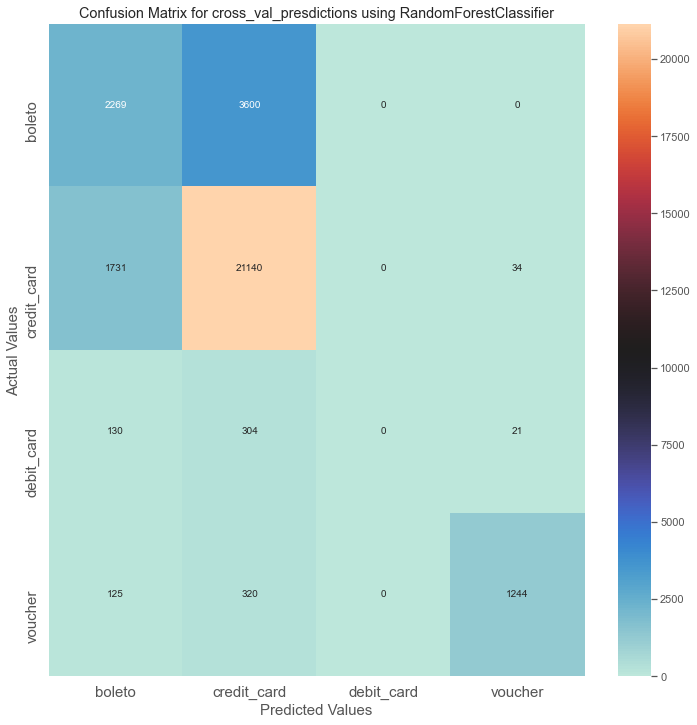

  payment_type  f1_measure
0       boleto        0.45
1  credit_card        0.88
2   debit_card        0.00
3      voucher        0.83
Mean Accuracy: 0.797367


In [135]:
# plot results in a heatmap
f, ax = plt.subplots(figsize=(12,12))

sns.heatmap(payment_conf_rfc, annot=True, fmt='g', ax=ax, cmap='icefire')

ax.set_xlabel('Predicted Values', size=15)
ax.set_ylabel('Actual Values', size=15)
ax.set_title('Confusion Matrix for cross_val_presdictions using RandomForestClassifier')
ax.xaxis.set_ticklabels(labels, size=15)
ax.yaxis.set_ticklabels(labels, size=15)
plt.show()

fmeasure_rfc = pd.DataFrame({'payment_type':labels,
                         'f1_measure': payment_f1_rfc})
print(fmeasure_rfc)
print('Mean Accuracy: %f' %(acc_rfc))

#### **RandomForestClassifier Predicted Chart Interpretation:** 
This heatmap shows us the true positive and false positive results from running the predictions using RandomForestClassifier on our dataset. The diagonal numbers from the top-left to the bottom-right represent the true positive results using the predict function from cross_val_predict and a test set that was never shown to the model because it was held out prior to any pre-processing, but the pre-processing was replicated to ensure the test set was shaped the same as the training set.

Any other number on the verticle that is not a true positive is considered a false positive because if we look at the boleto column, boleto was correctlly predicted 2,269 times compared to being predicted 1,731 when the payment method was actually a credit card, 130 times when the payment method was a debit card and finally 125 times when the payment method was a voucher. So there were a total of 2,524 false positive guess for a boleto. Boleta has a total of 3,600 False Negatives, meaning that it was mis predicted 3,600 times, mainly as a credit card 1,731 times. This provides us with a recall on boleto = 2269/5,869 = 0.387. The precision on boleto = 2269/4,255 = 0.533 for an f-measure of 0.45.

Intuitively credit cards are the most widely used payment source, so it makes sense that they have the highest true positive matches (21,140 TP/ 25,364 total positives (TP + FP), and debit cards are the least used with similar results (0 TP/ 0 total positives for an f-measure of 0 thanks to a recall = 0/0 = well you can't divide by 0, but we will call it 0 and that results in an f-measure of 0).

Noticeable, vouchers did pretty good with a 0.83 f-measure that is nearly as good as the credit cards.

Here we see that random forest actually didn't do so bad with the minority class, with the exception of debit cards and in just comparing the f-measures side by side, Random Forest wins out.

| Payment |KNN | NB | RF|
|:---| :---| :--- | :---|
| boleto | 0.26 | 0 | 0.45 | 
| credit | 0.84 | 0.85 | 0.88 |
| debit | 0.04 | 0 | 0 |
| voucher | 0.31 | 0 | 0.83 |

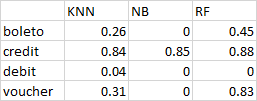

# <span style='color:blue'>Modeling and Evaluation 5 [10 points]</span>
<span style='color:blue'>
- Discuss the advantages of each model for each classification task, if any. 
- If there are not advantages, explain why. Is any model better than another? 
- Is the difference significant with 95% confidence? 
    - Use proper statistical comparison methods. 
    - You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.</span>

## <span style='color:red'> Task 1 - Delivery Date </span>

## <span style='color:red'> Task 2 - Review Scores </span> 

In [136]:
#results_voting = cross_validate(eclf, review_X_train_rs, review_train_y, cv=5, scoring='accuracy') 
results_rnd = cross_validate(review_rnd_clf, review_X_train_rs, review_train_y, cv=5, scoring='accuracy') 
results_sgd = cross_validate(review_sgd_clf, review_X_train_rs, review_train_y, cv=5, scoring='accuracy')

In [137]:
import scipy.stats
import math

# errors
err_rnd_sdg = (1-results_rnd['test_score'])-(1-results_sgd['test_score'])

# standard deviatons
std_err = np.std(err_rnd_sdg)

# dbars
dbar = np.mean(err_rnd_sdg)

# t crit value / sqrt(k)
t = scipy.stats.t.ppf(q=1-0.05/2,df=9)/ np.sqrt(10)

# == Conf Intervals

# == Random Forest vs Stochastic Gradient Descent Classifier

print('\n===== Random Forest Classifier vs Stochastic Gradient Descent Classifier =====\n')
CI_low_rnd_sgd = dbar - t*std_err
CI_high_rnd_sgd = dbar + t*std_err
print('KNN vs NB CI (%f, %f)' % (CI_low_rnd_sgd, CI_high_rnd_sgd))
print('With 95%','confidence, we fail to reject the null hypothesis that the Random Forest and Stochastic Gradient Descent classifiers\nare statistically the same, CI(%f, %f)' % (CI_low_rnd_sgd, CI_high_rnd_sgd))
print('Mean acc of Randon Forest is %f'%(np.mean(results_rnd['test_score'])))
print('Mean acc of Stochastic Gradient Descent is %f'%(np.mean(results_sgd['test_score'])))




===== Random Forest Classifier vs Stochastic Gradient Descent Classifier =====

KNN vs NB CI (-0.023709, -0.020704)
With 95% confidence, we fail to reject the null hypothesis that the Random Forest and Stochastic Gradient Descent classifiers
are statistically the same, CI(-0.023709, -0.020704)
Mean acc of Randon Forest is 0.817064
Mean acc of Stochastic Gradient Descent is 0.794857


In [138]:
results_rnd['test_score']


array([0.81646798, 0.8166066 , 0.81702246, 0.81653729, 0.81868589])

## <span style='color:red'> Task 3 - Payment Method </span>



 - Overall KNN felt that is performed the best using f-measures, again we used f-measures because we had an unbalanced class distribution in our response variable set.  
    - Random Forest did the best job of finding a better balance between precision and recall across the all 4 response classes.  Each model stuggled with the minority classes (not credit cards), but Random Forest was able to find an 80% balance between precision and recall in correctly identifying voucers.
    - Random Forest also has considerable more tuning parameters and while we were only able to tune a handful of them using GridSeachCV, I suspect with more time and better efficiency through practice we can really get this model performing well.
    - On the other hand KNN was able to find a 36% balance between precision and recall for vouchers while also getting a high balance on credit cards at 80%.
    - Both KNN and Random Forest performed similarly finding balance in correctly identifying boleto (17% and 18% respectively).
    - Naive Bayes was the worst performing model and my assumption is because the model independence between the feautes, so while it found a nice 85% f-measure for credit cards, it scored a 0 for all 3 minority classes, again keeping in mind the f-measure penalizes dramatically if either the precision or recall is 0, the whole f-measure = 0. 
- Is the difference significant with 95% confidence? 
    - Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.
    - See Below for Statistical Comparison:

In [139]:
#using the n_neighbors and weights parameters we deteremined work best above
# using cross_validate to get multiple groups of scores where I didn't know about this when i did modeling earlierv

random.seed(42)
np.random.seed(42)

# set a for collecting scores
scoring = ['accuracy', 'f1_weighted']

knn = KNeighborsClassifier(n_neighbors=8, weights='distance', metric='euclidean', n_jobs=-1)

# naive bayes using cv
nb = CategoricalNB(alpha = 1.0, fit_prior=True)

# Random Forest using tuning parameters and cv
rfc = RandomForestClassifier(n_estimators = 150, criterion = 'entropy',
                             min_samples_split = 2, min_samples_leaf = 1,
                             max_features = 5, random_state=42, n_jobs=-1)


results_knn = cross_validate(knn, payment_X_train_feats, payment_y_train_proc, cv=10, scoring=scoring) 
results_rfc = cross_validate(rfc, payment_X_train_feats, payment_y_train_proc, cv=10, scoring=scoring) 
    
#    cv_predict = model.predict(X_test_feats)

# note nb keeps kicking out errors with cross_val_score, so we will just use a simple accuracy score from nb
nb.fit(payment_X_train_feats, payment_y_train_proc)
yhat_nb = nb.predict(payment_X_test_feats)
acc_nb = accuracy_score(payment_y_test_proc, yhat_nb)



In [140]:
import scipy.stats
import math

# errors
err_knn_nb = (1-results_knn['test_accuracy'])-(1-acc_nb)
err_knn_rfc = (1-results_knn['test_accuracy'])-(1-results_rfc['test_accuracy'])
err_nb_rfc = (1-acc_nb)-(1-results_rfc['test_accuracy'])

# standard deviatons
std1 = np.std(err_knn_nb)
std2 = np.std(err_knn_rfc)
std3 = np.std(err_nb_rfc)

# dbars
dbar1 = np.mean(err_knn_nb)
dbar2 = np.mean(err_knn_rfc)
dbar3 = np.mean(err_nb_rfc)

# t crit value / sqrt(k)
t = scipy.stats.t.ppf(q=1-0.05/2,df=9)/ np.sqrt(10)

# == Conf Intervals

print('Note: In this section since we were not able to get the CategoricalNB to work with a cross validation score, we used the\nmean scores from the other models to compare to a single score of the NB model\n')

# == KNN vs NB
print('\n===== KNN vs Naive Bayes Classifier =====\n')
CI_low_knn_nb = dbar1 - t*std1
CI_high_knn_nb = dbar1 + t*std1
print('KNN vs NB CI (%f, %f)' % (CI_low_knn_nb, CI_high_knn_nb))
print('With 95%','confidence, we reject the null hypothesis that the KNN and Naive Bayes classifiers\nare statistically the same, CI(%f, %f)' % (CI_low_knn_nb, CI_high_knn_nb))
print('Mean acc of KNN is %f'%(np.mean(results_knn['test_accuracy'])))
print('Mean acc of NB is %f'%(acc_nb))



# == KNN vs RF
print('\n===== KNN vs Random Forest Classifier (using means) =====\n')
CI_low_knn_rf = dbar2 - t*std2
CI_high_knn_rf = dbar2 + t*std2
print('KNN vs RF CI (%f, %f)' % (CI_low_knn_rf, CI_high_knn_rf))
print('With 95%','confidence, we fail to reject the null hypothesis that the KNN and Random Forest classifiers\nare statistically the same, CI(%f, %f)' % (CI_low_knn_rf, CI_high_knn_rf))
print('Mean acc of KNN is %f'%(np.mean(results_knn['test_accuracy'])))
print('Mean acc of RFC is %f'%(np.mean(results_rfc['test_accuracy'])))

# == NB vs RF
print('\n===== Naive Bayes vs Random Forest Classifier ====\n')
CI_low_nb_rf = dbar3 - t*std3
CI_high_nb_rf = dbar3 + t*std3
print('NB vs RF CI (%f, %f)' % (CI_low_nb_rf, CI_high_nb_rf))
print('With 95%','confidence, we fail to reject the null hypothesis that the Naive Bayes and Random Forest classifiers\nare statistically the same, CI(%f, %f)' % (CI_low_nb_rf, CI_high_nb_rf))
print('Mean acc of NB is %f'%(acc_nb))
print('Mean acc of RFC is %f'%(np.mean(results_rfc['test_accuracy'])))

print('\nOpinion: This goes to show that accuracy is not the best way to evaluate models with unbalanced class distribution in')
print('classification because we can clearly see that naive bayes failed to predict anything other can credit cards')
print('while the other models at least made some predictions against the other classes')

Note: In this section since we were not able to get the CategoricalNB to work with a cross validation score, we used the
mean scores from the other models to compare to a single score of the NB model


===== KNN vs Naive Bayes Classifier =====

KNN vs NB CI (-0.000352, 0.004073)
With 95% confidence, we reject the null hypothesis that the KNN and Naive Bayes classifiers
are statistically the same, CI(-0.000352, 0.004073)
Mean acc of KNN is 0.738938
Mean acc of NB is 0.740798

===== KNN vs Random Forest Classifier (using means) =====

KNN vs RF CI (0.056015, 0.060397)
With 95% confidence, we fail to reject the null hypothesis that the KNN and Random Forest classifiers
are statistically the same, CI(0.056015, 0.060397)
Mean acc of KNN is 0.738938
Mean acc of RFC is 0.797144

===== Naive Bayes vs Random Forest Classifier ====

NB vs RF CI (0.053436, 0.059256)
With 95% confidence, we fail to reject the null hypothesis that the Naive Bayes and Random Forest classifiers
are statistically the 

# <span style='color:blue'>Modeling and Evaluation 6 [10 points]</span>
<span style='color:blue'>* [10 points] Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.</span>

### Feature Importance
- In addition to prediction, understanding the aspects of the order transaction that control delivery will inform improvement steps.
- Such features can be obtained from the model that predicted the target variable.
    - Unfortunately, the series of column transformation applied to the data made it difficult to display the original attribute names.
    - However, in a similar version, we can use treet based algorithms to score these attributes in their raw state.
    - This is a reliable method, given that scaling and standardization are not essential for tree-based algorithms.
    

## <span style='color:red'> Task 1 - Delivery Date </span>
For feature importance we utilized sklearn's premutation_importance function since some of our features have a high cardinatilty as is pointed out above in the data transformation for task2 - delivery date.
https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html?highlight=permutation_importance#sklearn.inspection.permutation_importance
https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance

In [143]:
random.seed(42)
np.random.seed(42)

rnd_reg.fit(delivery_X_train_class, delivery_train_y)
imps_rnd = permutation_importance(rnd_reg, delivery_X_test_class, delivery_test_y,
                            n_repeats = 10,  # this is the default
                            random_state=42)

importance = imps_rnd.importances_mean
for i,v in zip(delivery_train_noY.columns, importance):
    print('Feature: %s, Score: %.5f' % (i,v))
 

Feature: customer_zip_code_prefix, Score: 0.00000
Feature: payment_sequential, Score: 0.00000
Feature: payment_type, Score: 0.01485
Feature: payment_installments, Score: -0.00003
Feature: freight_value, Score: 0.00004
Feature: product_weight_g, Score: 0.00001
Feature: product_category_english, Score: -0.00003
Feature: seller_zip_code_prefix, Score: -0.00003
Feature: tot_order_amt, Score: -0.00002
Feature: purchase_wk_day, Score: -0.00001
Feature: purchase_month, Score: 0.08356
Feature: product_dimensions, Score: 0.00000
Feature: purchase_year, Score: -0.00001
Feature: purchase_hour, Score: 0.00000
Feature: purchase_month_num, Score: 0.00000
Feature: purchase_day_num, Score: 0.00000
Feature: review_score_class_num, Score: 0.00000


**Permutation Importance Ranked**

| Feature  | Score |
| :--- | :--- |
| purchase_month, | 0.08356 |
| payment_type, | 0.01485 |
| freight_value, | 0.00004 |
| product_weight_g, | 0.00001 |
| customer_zip_code_prefix, | 0 |
| payment_sequential, | 0 |
| product_dimensions, | 0 |
| purchase_hour, | 0 |
| purchase_month_num, | 0 |
| purchase_day_num, | 0 |
| order_deliver_actual_duration, | 0 |
| purchase_wk_day, | -0.00001 |
| purchase_year, | -0.00001 |
| tot_order_amt, | -0.00002 |
| payment_installments, | -0.00003 |
| product_category_english, | -0.00003 |
| seller_zip_code_prefix, | -0.00003 |


## <span style='color:red'> Task 2 - Review Scores </span> 

**Error in prediction**
- *could not convert string to float: 'furniture_decor'*.  
- Therefore I converted some of the feature levels to numericals.

In [144]:
#### Processing for feature selection
review_fs = copy.deepcopy(olist_model4)
review_fs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103058 entries, 0 to 114066
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   customer_zip_code_prefix       103058 non-null  category
 1   payment_sequential             103058 non-null  float64 
 2   payment_type                   103058 non-null  category
 3   payment_installments           103058 non-null  float64 
 4   freight_value                  103058 non-null  float64 
 5   product_weight_g               103058 non-null  float64 
 6   product_category_english       103058 non-null  category
 7   seller_zip_code_prefix         103058 non-null  category
 8   tot_order_amt                  103058 non-null  float64 
 9   purchase_wk_day                103058 non-null  category
 10  purchase_month                 103058 non-null  category
 11  product_dimensions             103058 non-null  float64 
 12  purchase_year   

Given errors in string format categories, I changed the level to numeric values

In [145]:
for_code = ['product_category_english', 'purchase_wk_day', 'purchase_month', 'payment_type']

In [146]:
review_fs.columns

Index(['customer_zip_code_prefix', 'payment_sequential', 'payment_type',
       'payment_installments', 'freight_value', 'product_weight_g',
       'product_category_english', 'seller_zip_code_prefix', 'tot_order_amt',
       'purchase_wk_day', 'purchase_month', 'product_dimensions',
       'purchase_year', 'purchase_hour', 'purchase_month_num',
       'purchase_day_num', 'review_score_class_num',
       'order_deliver_actual_duration'],
      dtype='object')

In [147]:
for i in review_fs.columns:
    if i in for_code:
        review_fs[i] = review_fs[i].copy().astype("category").cat.codes
        

In [148]:
review_fs.head()

,customer_zip_code_prefix,payment_sequential,payment_type,payment_installments,freight_value,product_weight_g,product_category_english,seller_zip_code_prefix,tot_order_amt,purchase_wk_day,purchase_month,product_dimensions,purchase_year,purchase_hour,purchase_month_num,purchase_day_num,review_score_class_num,order_deliver_actual_duration
0,39801,1.00,1,8.00,19.53,800.00,15,13321.00,99.33,6,0,7803.00,2018,22,4,2,0,13.00
1,2422,1.00,1,1.00,7.39,150.00,0,4660.00,24.39,5,6,1056.00,2018,11,6,1,2,3.00
2,2652,1.00,1,1.00,8.72,250.00,20,9015.00,65.71,5,2,3360.00,2017,11,12,1,2,4.00
3,36060,1.00,1,8.00,17.88,1200.00,2,13405.00,107.78,6,2,3080.00,2017,12,12,2,2,14.00
5,18570,1.00,1,2.00,14.88,835.00,2,14940.00,128.45,1,8,11880.00,2018,13,5,0,2,11.00


In [149]:
review_fs.isnull().values.any()

False

In [150]:
#No NaNs came up. Too few to deal with so I removed them.
review_fs.isnull().sum().sum()

0

In [151]:
#review_fs.dropna(inplace=True)

In [152]:
#Simple train test split
review_fs_train, review_fs_test = train_test_split(review_fs, test_size=0.3,random_state=42, stratify=review_fs.review_score_class_num)

In [153]:
review_fs_train_y = review_fs_train.review_score_class_num

In [154]:
review_fs_test_y = review_fs_test.review_score_class_num

In [155]:
review_fs_test_noY = review_fs_test.copy().drop(columns=['review_score_class_num'])
review_fs_test_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30918 entries, 70280 to 20385
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   customer_zip_code_prefix       30918 non-null  category
 1   payment_sequential             30918 non-null  float64 
 2   payment_type                   30918 non-null  int8    
 3   payment_installments           30918 non-null  float64 
 4   freight_value                  30918 non-null  float64 
 5   product_weight_g               30918 non-null  float64 
 6   product_category_english       30918 non-null  int8    
 7   seller_zip_code_prefix         30918 non-null  category
 8   tot_order_amt                  30918 non-null  float64 
 9   purchase_wk_day                30918 non-null  int8    
 10  purchase_month                 30918 non-null  int8    
 11  product_dimensions             30918 non-null  float64 
 12  purchase_year               

In [156]:
review_fs_train_noY = review_fs_train.copy().drop(columns=['review_score_class_num'])
review_fs_train_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72140 entries, 29410 to 48553
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   customer_zip_code_prefix       72140 non-null  category
 1   payment_sequential             72140 non-null  float64 
 2   payment_type                   72140 non-null  int8    
 3   payment_installments           72140 non-null  float64 
 4   freight_value                  72140 non-null  float64 
 5   product_weight_g               72140 non-null  float64 
 6   product_category_english       72140 non-null  int8    
 7   seller_zip_code_prefix         72140 non-null  category
 8   tot_order_amt                  72140 non-null  float64 
 9   purchase_wk_day                72140 non-null  int8    
 10  purchase_month                 72140 non-null  int8    
 11  product_dimensions             72140 non-null  float64 
 12  purchase_year               

**Importance**

*NOTE*:  
Feature importance code block was adapted from:  
- Feature importances with a forest of trees, Sci-Kit Learn.  
    - https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [157]:
model = DecisionTreeClassifier()
model.fit(review_fs_train_noY, review_fs_train_y)
importance = model.feature_importances_
for i,v in zip(review_fs_train_noY.columns, importance):
    print('Feature: %s, Score: %.5f' % (i,v))
    

Feature: customer_zip_code_prefix, Score: 0.12007
Feature: payment_sequential, Score: 0.00471
Feature: payment_type, Score: 0.01654
Feature: payment_installments, Score: 0.03677
Feature: freight_value, Score: 0.09603
Feature: product_weight_g, Score: 0.07015
Feature: product_category_english, Score: 0.04463
Feature: seller_zip_code_prefix, Score: 0.07187
Feature: tot_order_amt, Score: 0.09643
Feature: purchase_wk_day, Score: 0.03682
Feature: purchase_month, Score: 0.04134
Feature: product_dimensions, Score: 0.07973
Feature: purchase_year, Score: 0.01050
Feature: purchase_hour, Score: 0.07151
Feature: purchase_month_num, Score: 0.04014
Feature: purchase_day_num, Score: 0.03251
Feature: order_deliver_actual_duration, Score: 0.13024


These are the feature scores by importance

| Feature  | Score |
| :--- | :--- |
| order_deliver_actual_duration, | 0.13024 |
| customer_zip_code_prefix, | 0.12007 |
| tot_order_amt, | 0.09643 |
| freight_value, | 0.09603 |
| product_dimensions, | 0.07973 |
| seller_zip_code_prefix, | 0.07187 |
| purchase_hour, | 0.07151 |
| product_weight_g, | 0.07015 |
| product_category_english, | 0.04463 |
| purchase_month, | 0.04134 |
| purchase_month_num, | 0.04014 |
| purchase_wk_day, | 0.03682 |
| payment_installments, | 0.03677 |
| purchase_day_num, | 0.03251 |
| payment_type, | 0.01654 |
| purchase_year, | 0.0105 |
| payment_sequential, | 0.00471 |

In [158]:
importance[0]

0.12006742465398114

In [159]:
#Reminder of class proportions
olist_model4['review_score_class_num'].value_counts()/len(olist_model4)

2   0.78
0   0.14
1   0.08
Name: review_score_class_num, dtype: float64

#### Importance of Features

*Note: *Review Score representation: 0 = Bad (17%), 1 = fair (9%), 2 = Good (84%)
**Caveat**

The feature importance as shown here is not the feature importance responsible for EACH class, rather it is the important features that influenced the classifier's decision to discern among the classes.


- Feature with the highest score is order_deliver_actual_duration
- followed by customer_zip_code_prefix
- followed by tot_order_amt(total order amount and freight_value)

- I believe the reason why the algorithm rightly picked order_deliver_actual_duration as the highest score is because, earlier, we saw a strong association that implies that customers who received their order early provided good reviews.
- As for customer_zip_code_prefix: This may not have a direct association with customer review score.
- Rather, the fact that most customers come from a certain location means that their will be a greater number of customers providing review scores in general. 

## <span style='color:red'> Task 3 - Payment Method </span>
- For feature importance we utilized sklearn's premutation_importance  function since some of our features have a high cardinatilty as is pointed out above in the data transformation for task2 - delivery date.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html?highlight=permutation_importance#sklearn.inspection.permutation_importance<br>
https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance



In [160]:
random.seed(42)
np.random.seed(42)
rfc.fit(payment_X_train_feats, payment_y_train_proc)
imps = permutation_importance(rfc, payment_X_test_feats, payment_y_test_proc,
                            n_repeats = 10,  # this is the default
                            random_state=42)

feature_names = feat_scores.feature[0:11]

print('\nPrint just the permutation importance\n')
for i in range(len(imps.importances_mean)): 
    print(i,' ', feature_names[i],' ', imps.importances_mean[i])

print('\nPrint just the importances from the RandomForestClassifier\n')
for i in range(len(rfc.feature_importances_)): 
    print(i,' ', feature_names[i],' ',rfc.feature_importances_[i])


Print just the permutation importance

0   freight_value   0.00745843845009383
1   product_weight_g   0.0008085904651012777
2   purchase_day   0.0013875412381137652
3   purchase_hour   0.04261918623455596
4   seller_zip_code_prefix   0.15014878064557866
5   purchase_year   0.0027556763050650356
6   tot_order_amt   0.017759880975483578
7   payment_installments   0.0010414645190504278
8   product_dimensions   0.005268775470599685
9   payment_sequential   0.005592211656640178
10   customer_zip_code_prefix   0.0036354227310951837

Print just the importances from the RandomForestClassifier

0   freight_value   0.10694143077118863
1   product_weight_g   0.04563346676745266
2   purchase_day   0.06743436158867731
3   purchase_hour   0.14339505710786957
4   seller_zip_code_prefix   0.2871236016402483
5   purchase_year   0.06584858657267825
6   tot_order_amt   0.10042066946454827
7   payment_installments   0.0740357487251057
8   product_dimensions   0.005102757027345552
9   payment_sequential  

**Permutation Importance in Order** 

| Feature  | Score |
| :--- | :--- |
| seller_zip_code_prefix | 0.150148780645578 |
| purchase_hour | 0.0426191862345559 |
| tot_order_amt | 0.0177598809754835 |
| freight_value | 0.00745843845009383 |
| payment_sequential | 0.00559221165664017 |
| product_dimensions | 0.00526877547059968 |
| customer_zip_code_prefix | 0.00363542273109518 |
| purchase_year | 0.00275567630506503 |
| purchase_day | 0.00138754123811376 |
| payment_installments | 0.00104146451905042 |
| product_weight_g | 0.000808590465101277 |



# <span style='color:blue'>Deployment</span>
<span style='color:blue'>* [5 Points] How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would you deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?</span>

### <span style='color:red'> Task 3: Predict Payment Method & Deployment</span>
- How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? 
    - <span style='color:blue'>I feel with more adequate model training being able to predict how customers will pay for merchandise can be very useful. For one, companies can use that sort of information to try and negotiate lower credit card transaction fees, or perhaps entice customers to use boleto or debit cards that possiby have lower transaction fees. It could also lead to a company establishing its own credit card to offer additional perks to customers and perhaps clients (in this case sellers on olist) to help increase overall revenue from monthly seller fees and seller commissions.</span> 
- How would you measure the model's value if it was used by these parties? 
    - <span style='color:blue'>The model's value can be measured monetarily in that you can attach a brazilian dollar value to how much money was saved in transaction fees as a result of accuract predictions in customer payment methods and how those predictions were able to lower vendor fees or perhaps help to establish an olist visa/ mastercard.</span>
- How would you deploy your model for interested parties? 
    - <span style='color:blue'>More than likely this model would be deployed via a business intelligence tool such as Power BI or Tableau so that it can be integrated right into the business intelligence workflow and ultilately provide predictive analytics back to executives or financial advisors for the company.</span>
- What other data should be collected? How often would the model need to be updated, etc.?
    - <span style='color:blue'>Other data that could be helpful are customer spending habits by region (state or city - values that can be derived from the current data), how a customer orders merchdise - browser on a computer vs mobile device, in-app or at a kiosk, and finally a customer's gender may be helpful to see if men or women are more likely to use credit cards vs boleto (the 2 most used payment methods on the olist platform).</span>

# <span style='color:blue'>Exceptional Work [10 points]</span>
<span style='color:blue'> * You have free reign to provide additional analyses. <br>
<span style='color:blue'> * One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm? 

- SelectKBest was utilized for all the models build to classify payment_method, we set the k=11 features
- GridSearchCV was used to tune the hyperparamters for the RandomForestClassifer model to classify payment_method
- cross_validate was used to get multiple scores that are not directly offered via cross_val_select, we did notive that there is now a work-around method in sklearn to utilize MultiScorer, but we were pretty far down the project path by that point